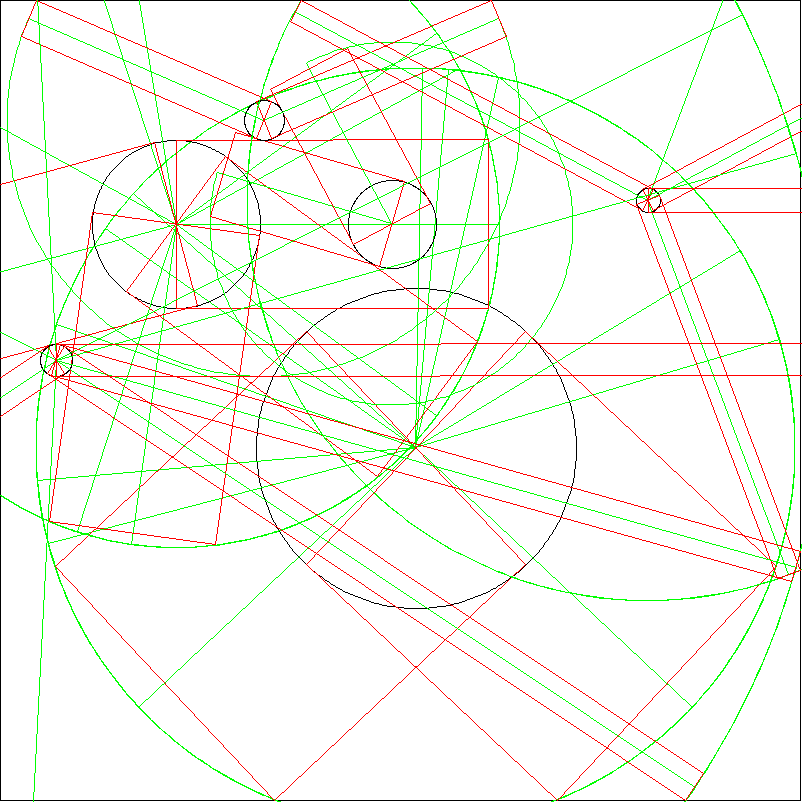

Forest 1
6 tree(s) can be cut



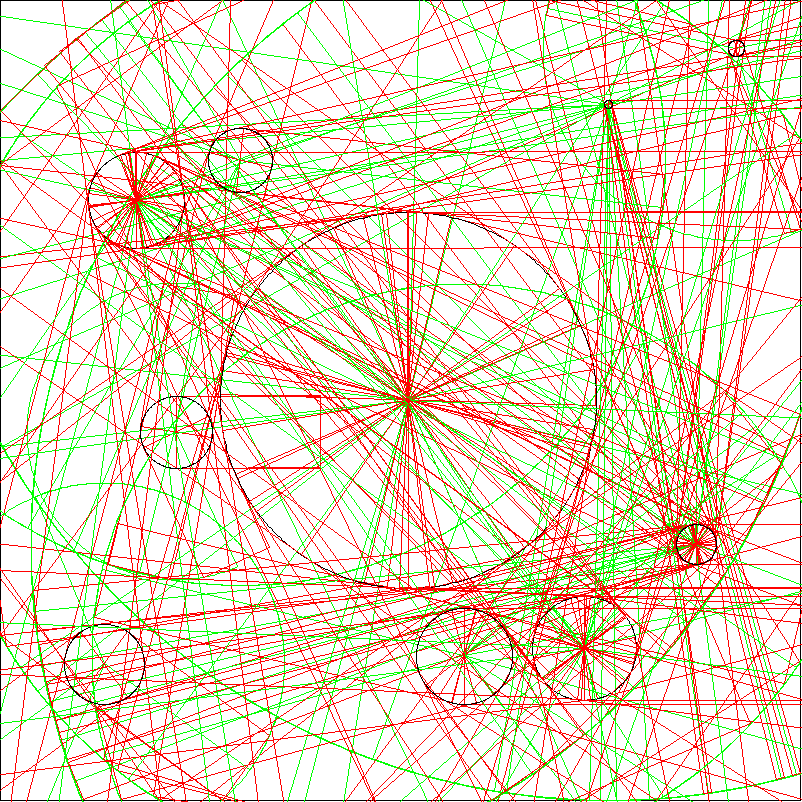

Forest 2
7 tree(s) can be cut



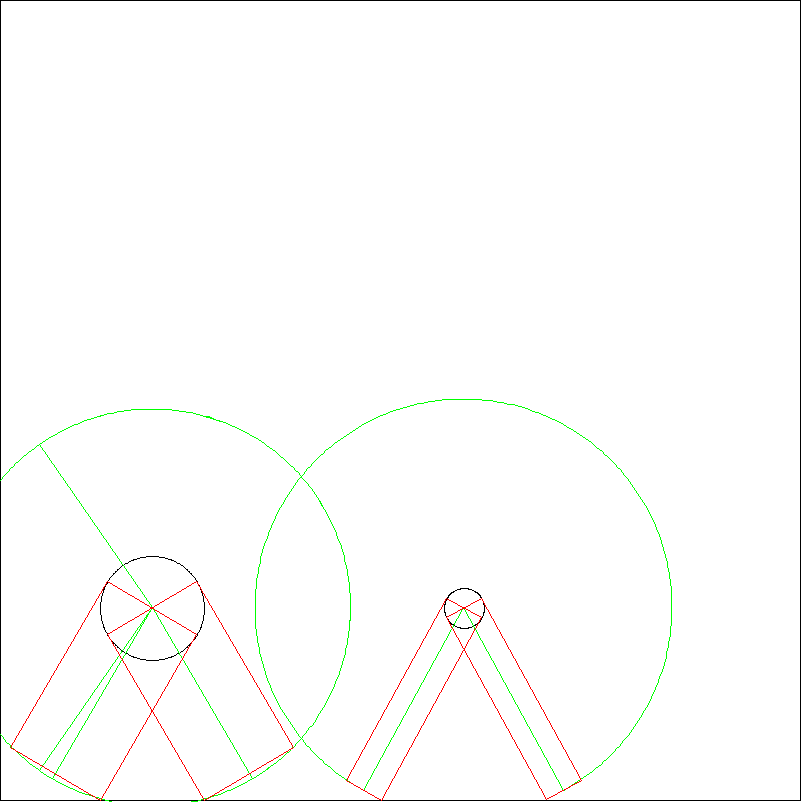

Forest 3
2 tree(s) can be cut



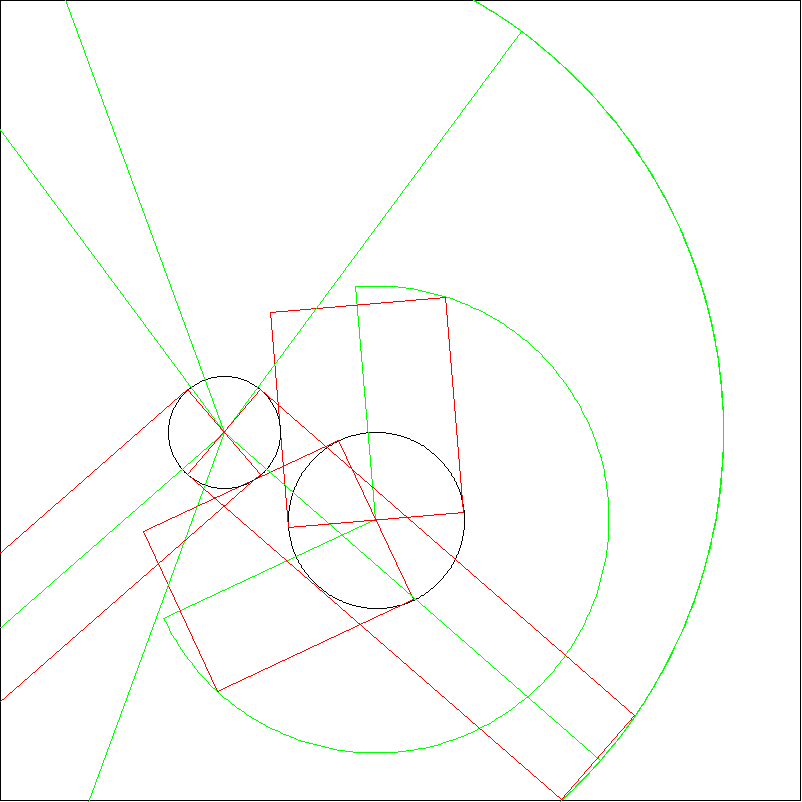

Forest 4
2 tree(s) can be cut



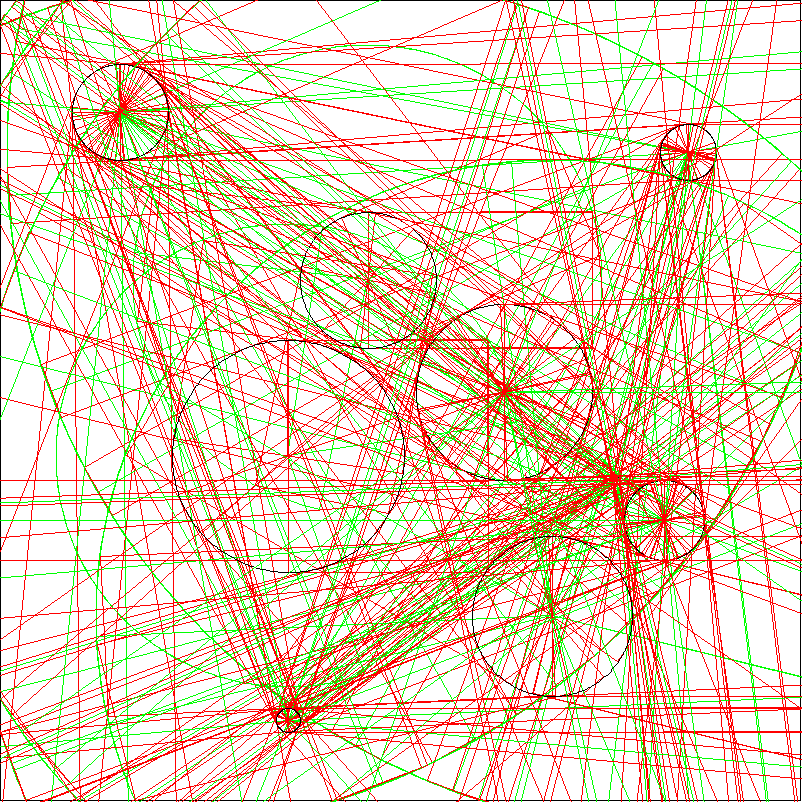

Forest 5
6 tree(s) can be cut



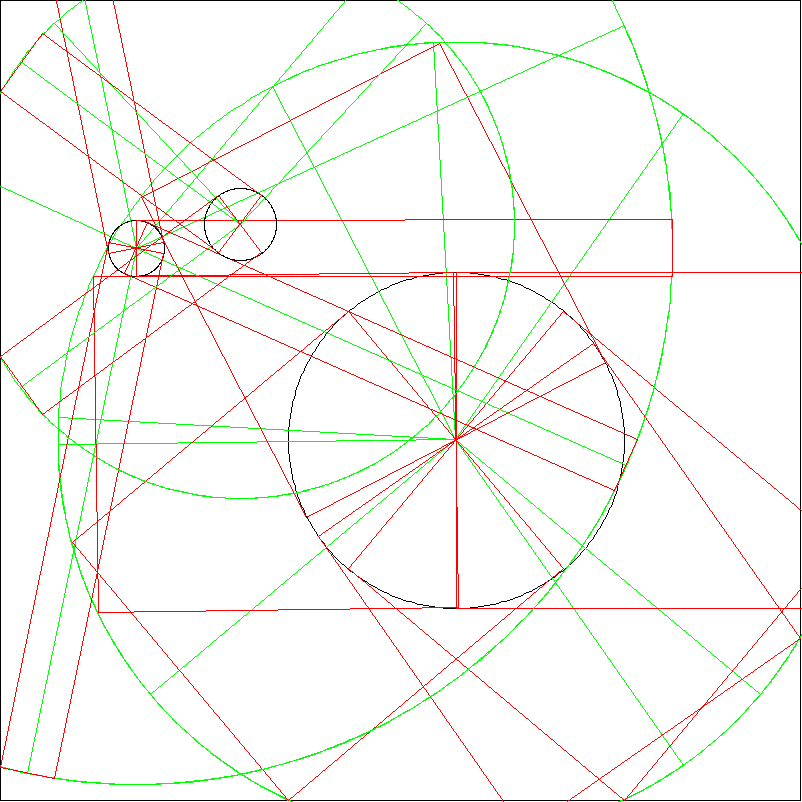

Forest 6
3 tree(s) can be cut



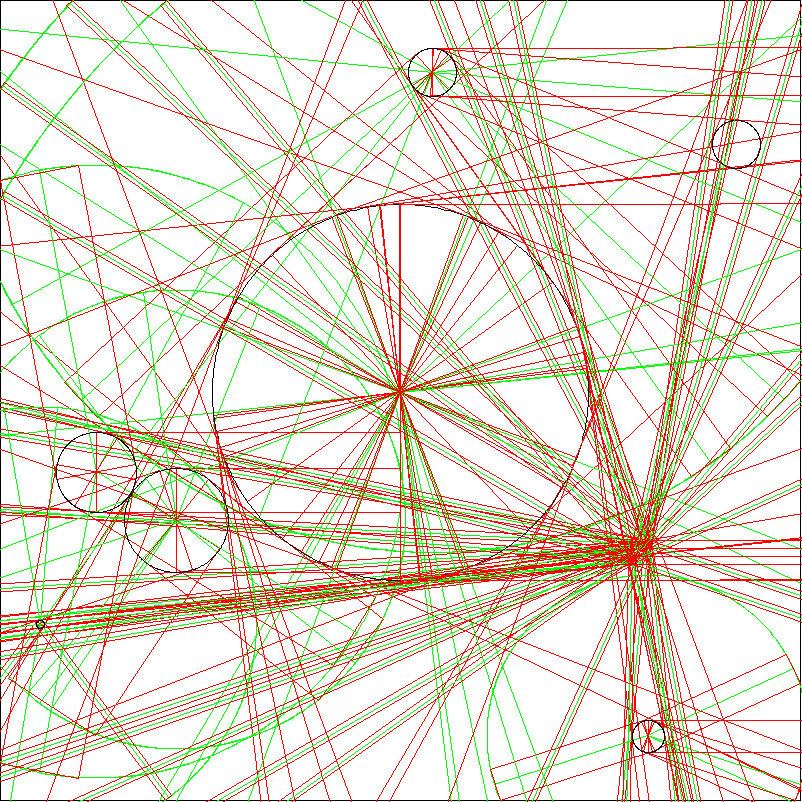

Forest 7
6 tree(s) can be cut



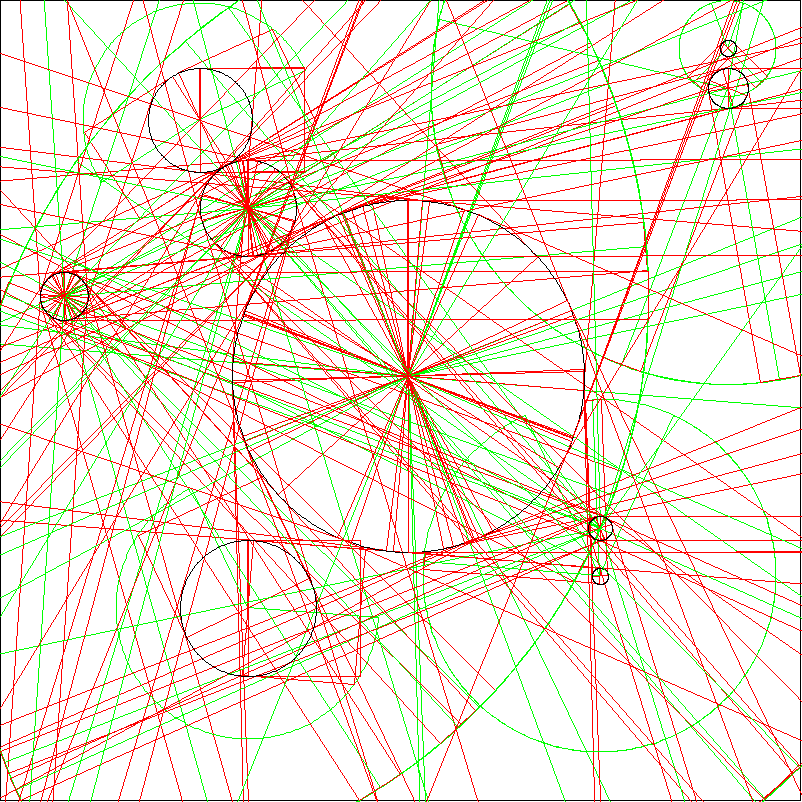

Forest 8
7 tree(s) can be cut



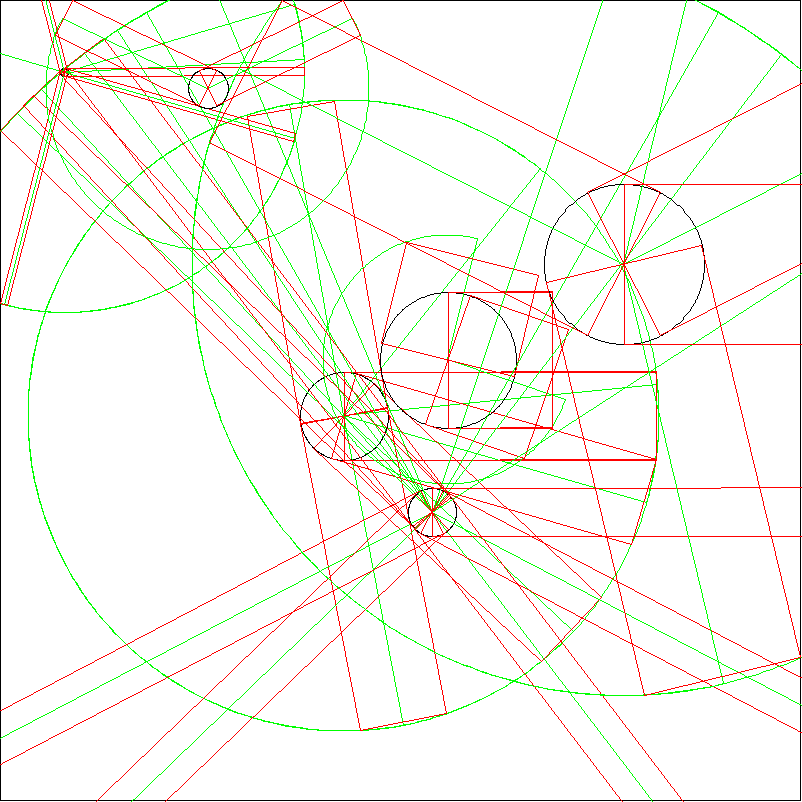

Forest 9
6 tree(s) can be cut



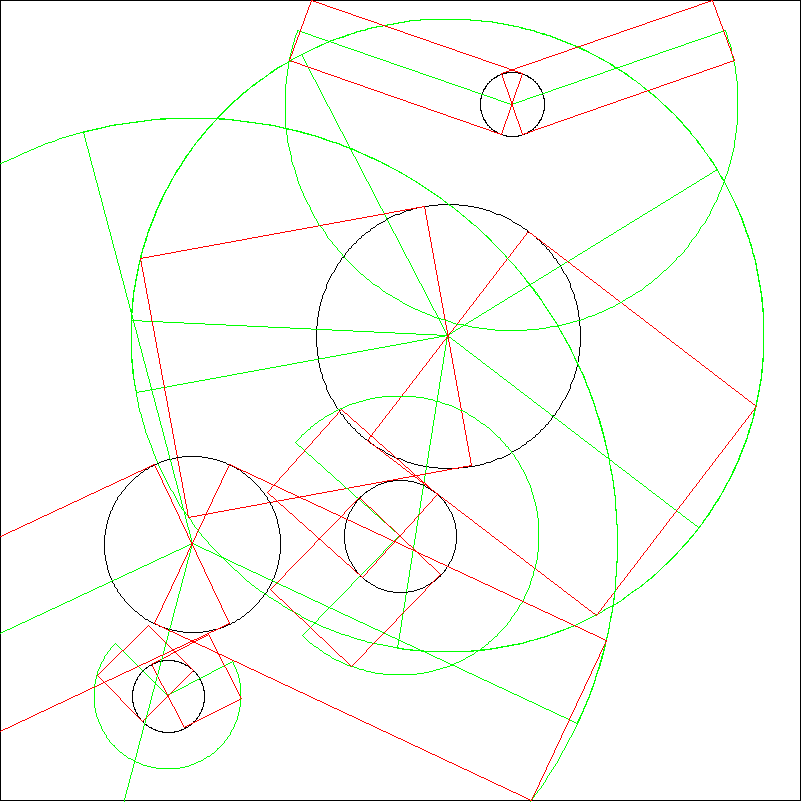

Forest 10
5 tree(s) can be cut



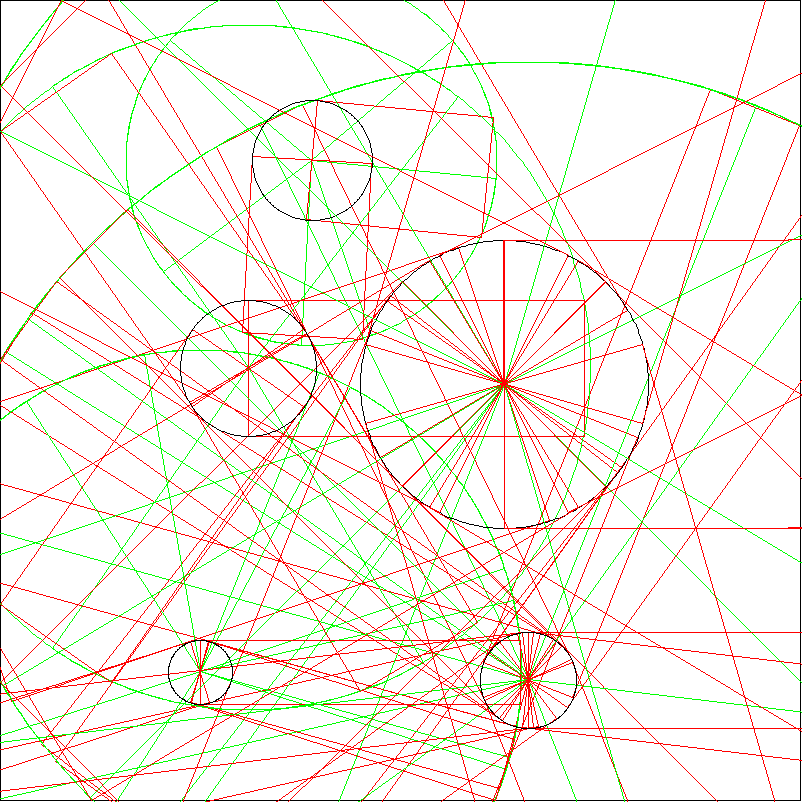

Forest 11
4 tree(s) can be cut



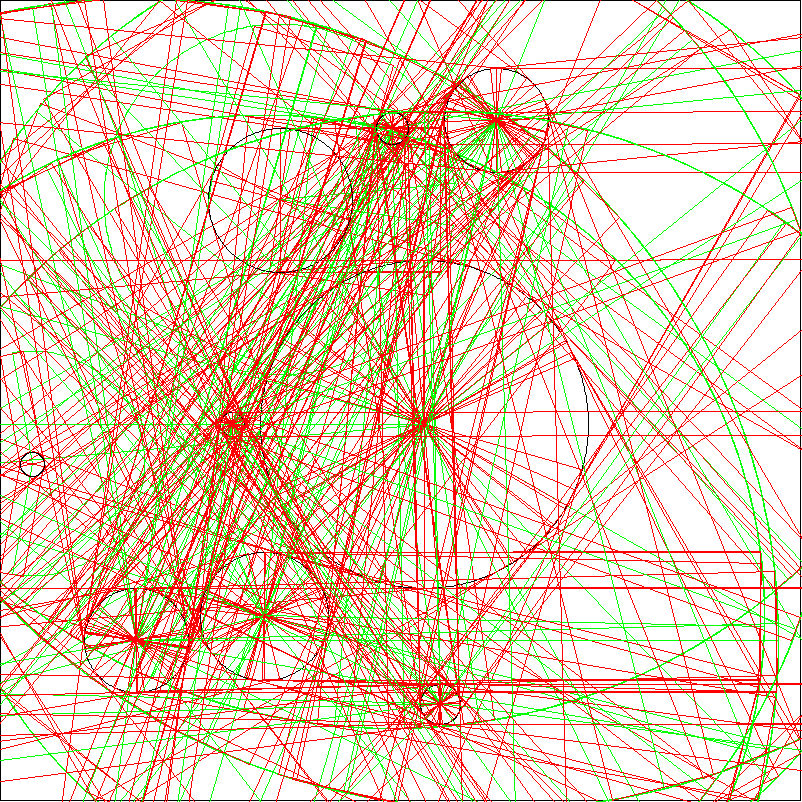

Forest 12
3 tree(s) can be cut



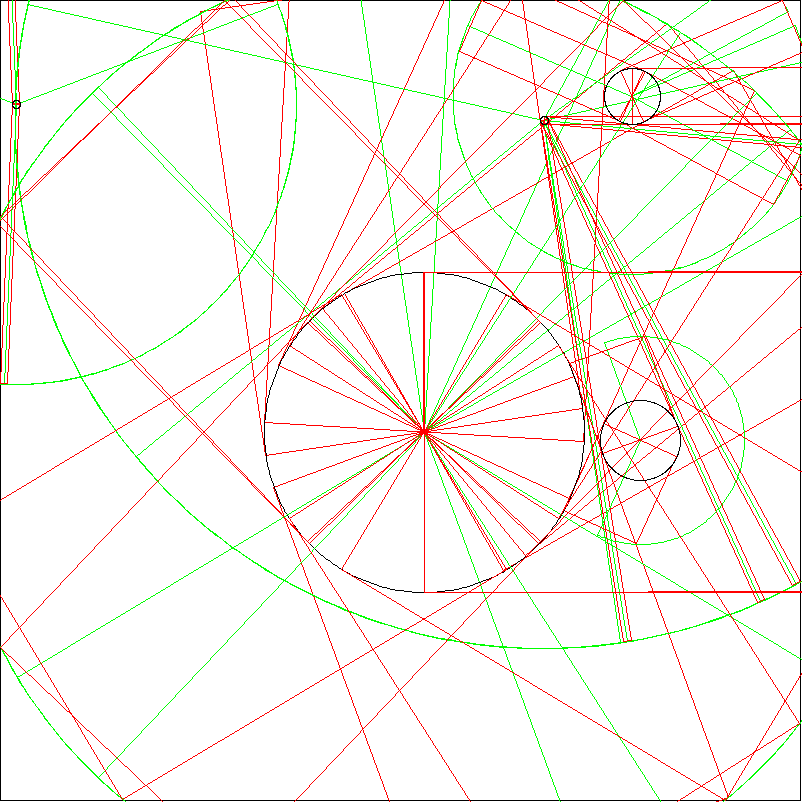

Forest 13
4 tree(s) can be cut



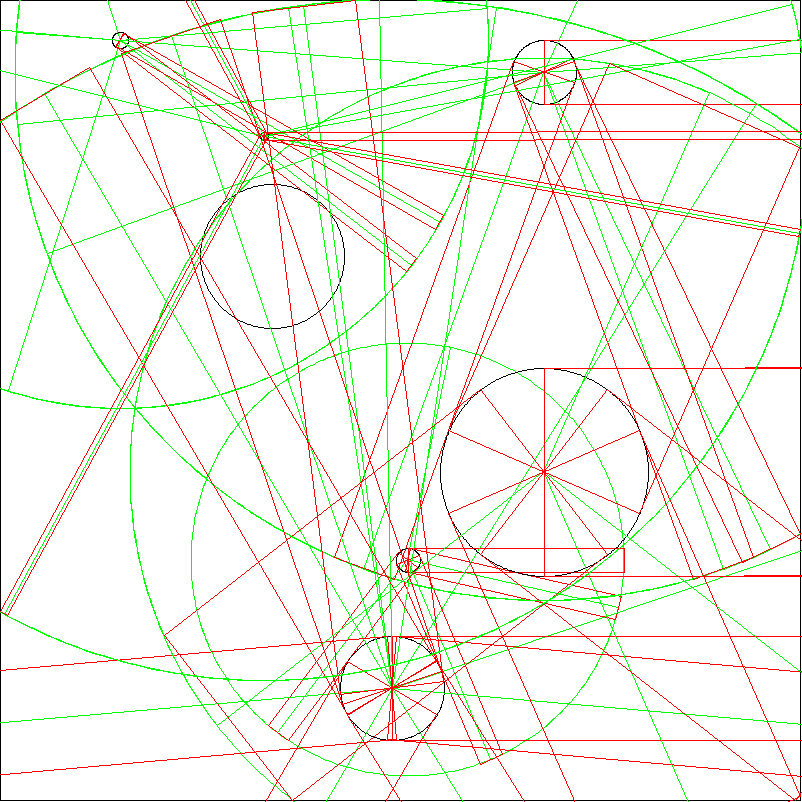

Forest 14
7 tree(s) can be cut



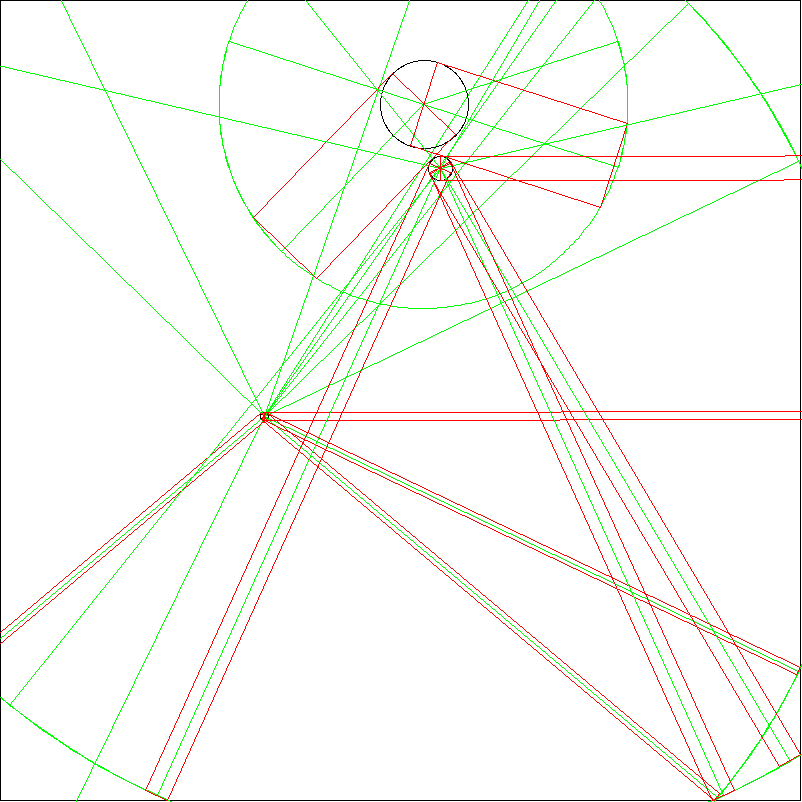

Forest 15
3 tree(s) can be cut



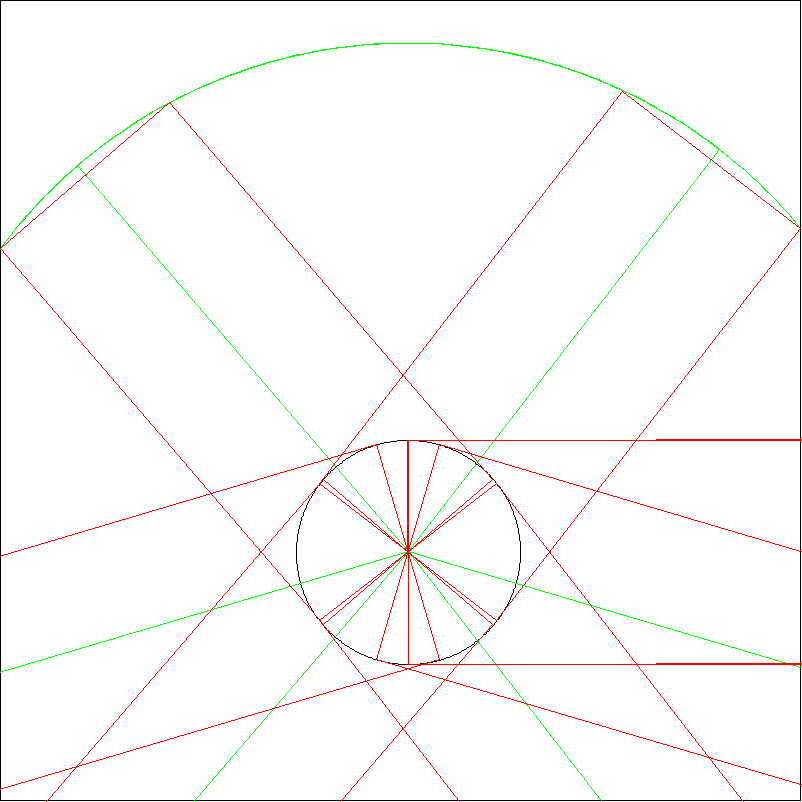

Forest 16
1 tree(s) can be cut



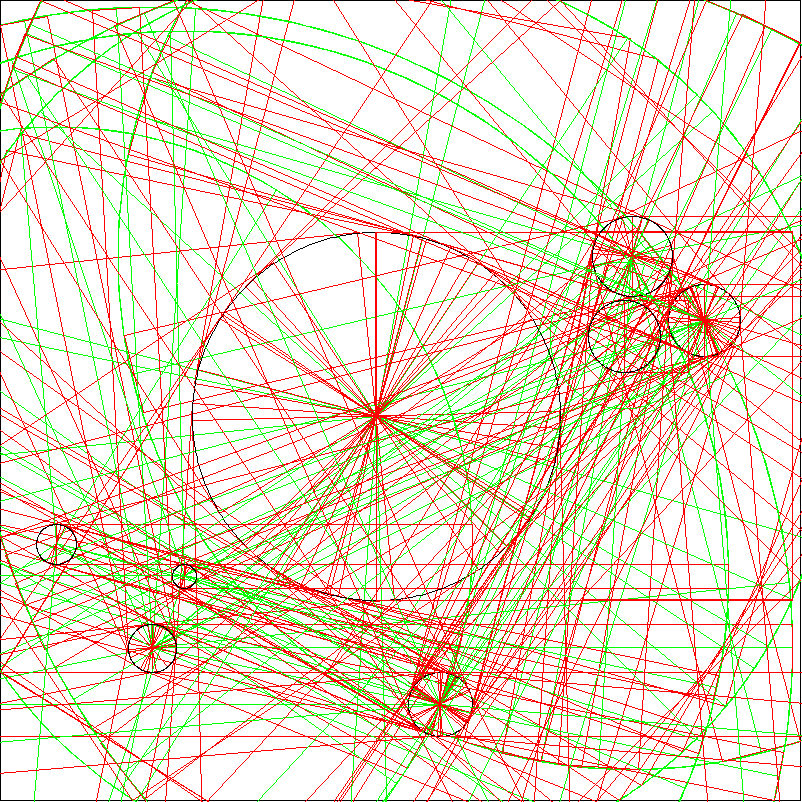

Forest 17
5 tree(s) can be cut



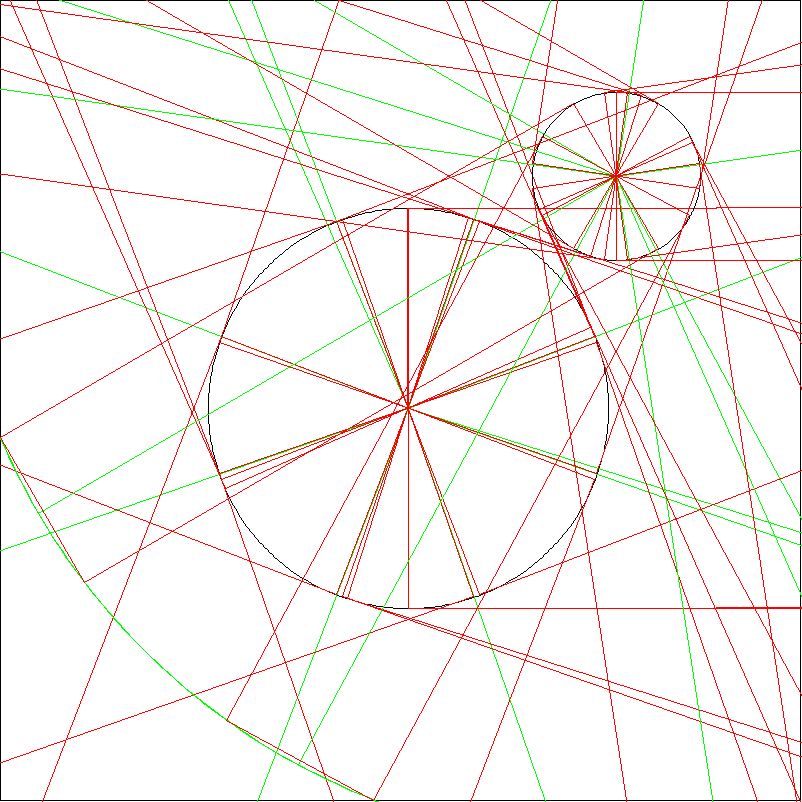

Forest 18
0 tree(s) can be cut



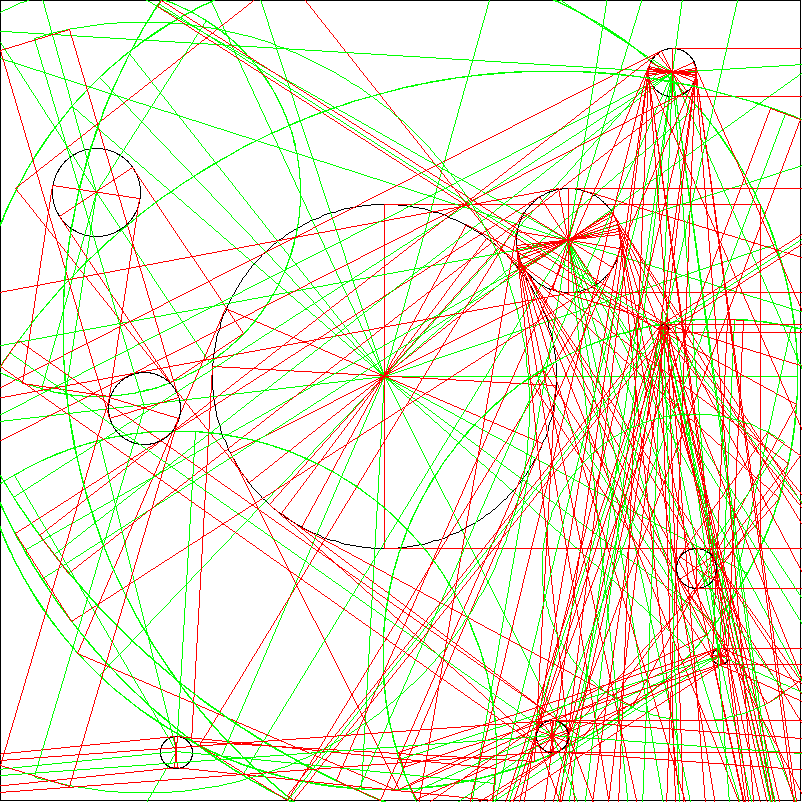

Forest 19
10 tree(s) can be cut



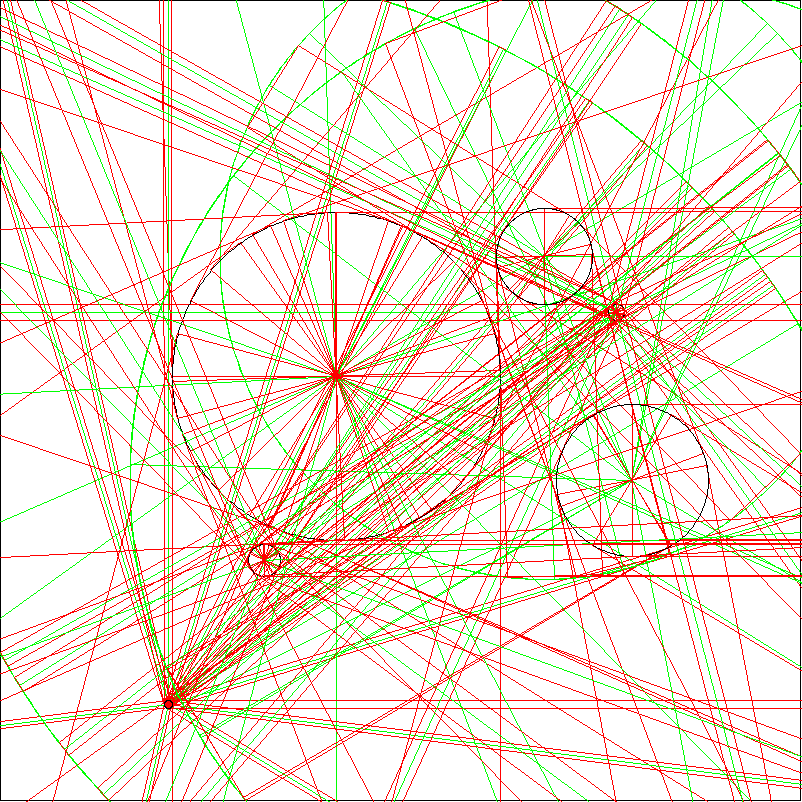

Forest 20
3 tree(s) can be cut



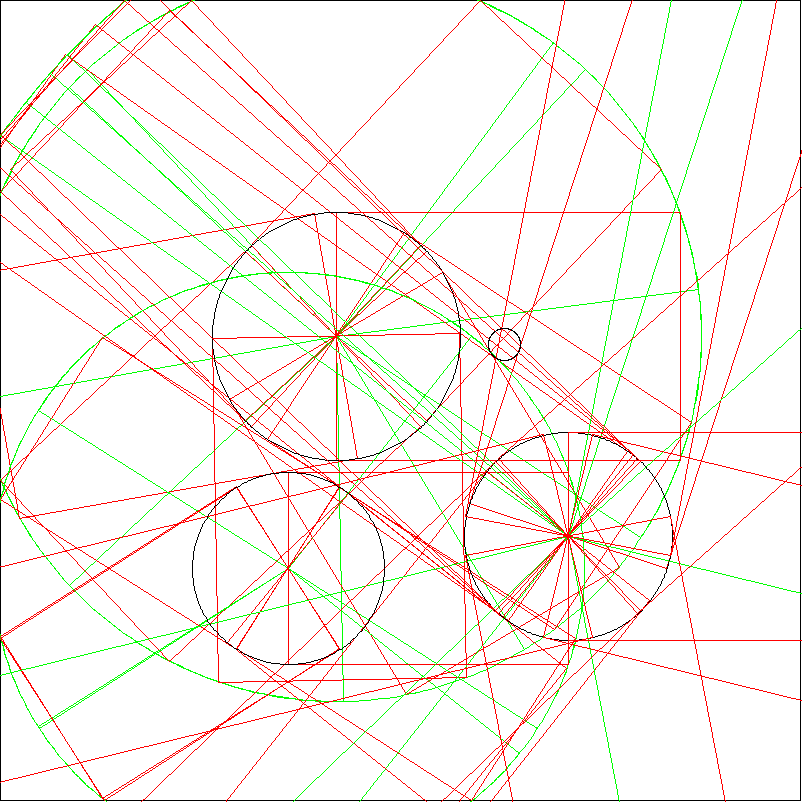

Forest 21
3 tree(s) can be cut



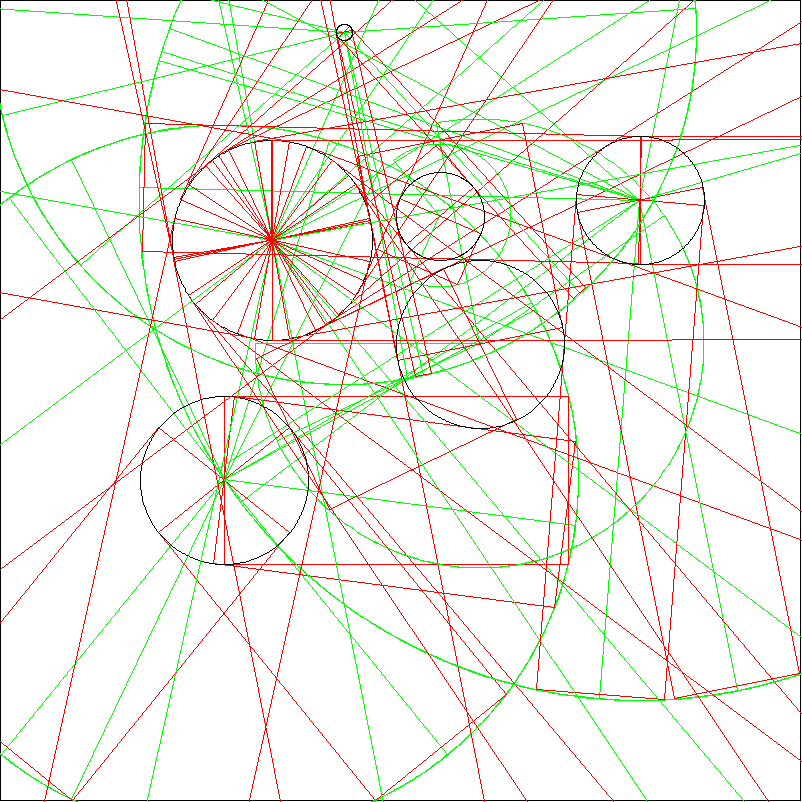

Forest 22
5 tree(s) can be cut



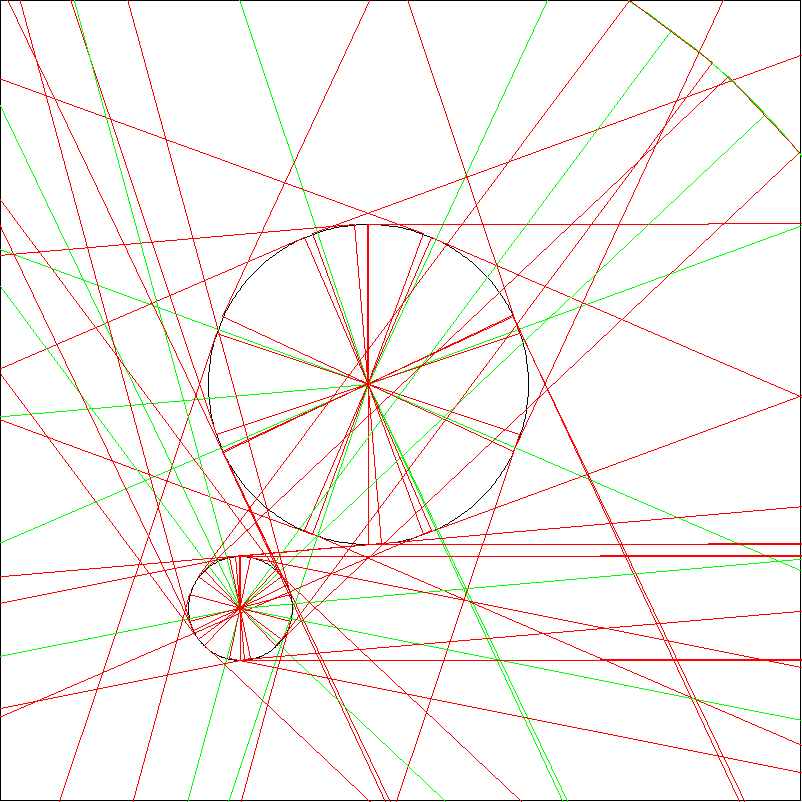

Forest 23
0 tree(s) can be cut



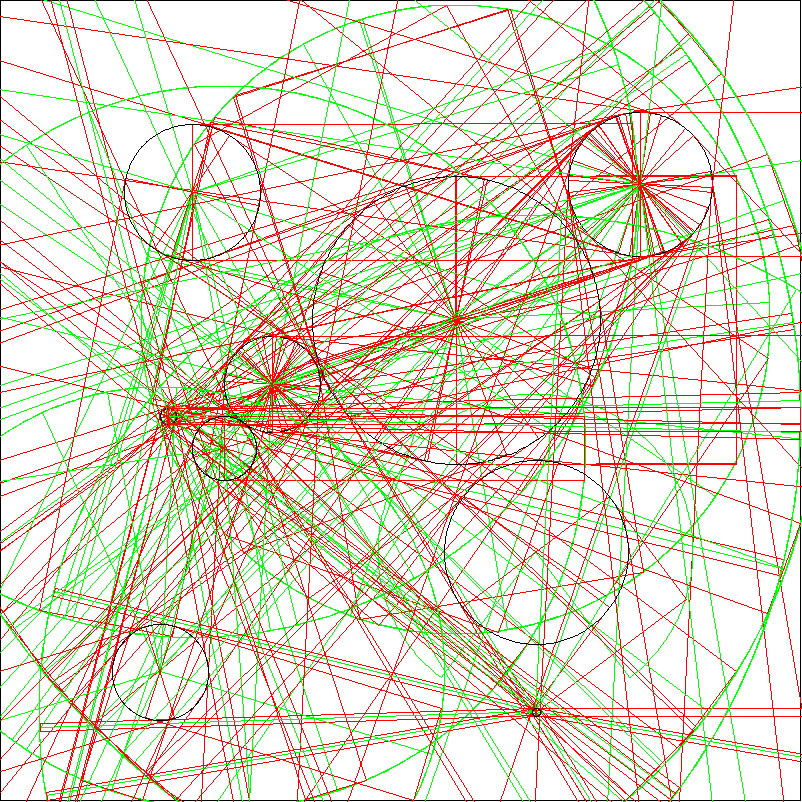

Forest 24
9 tree(s) can be cut



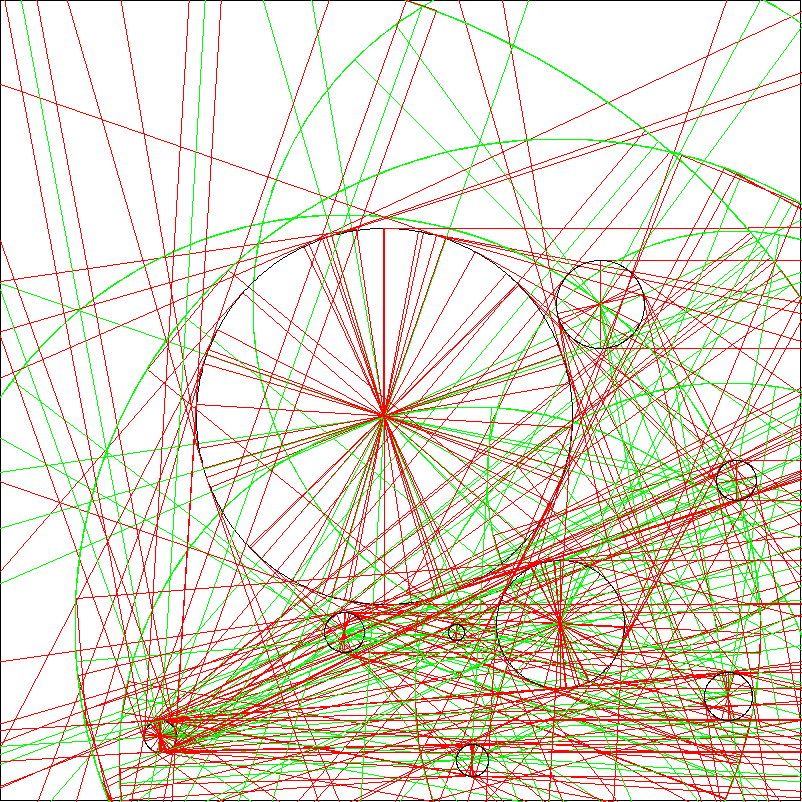

Forest 25
6 tree(s) can be cut



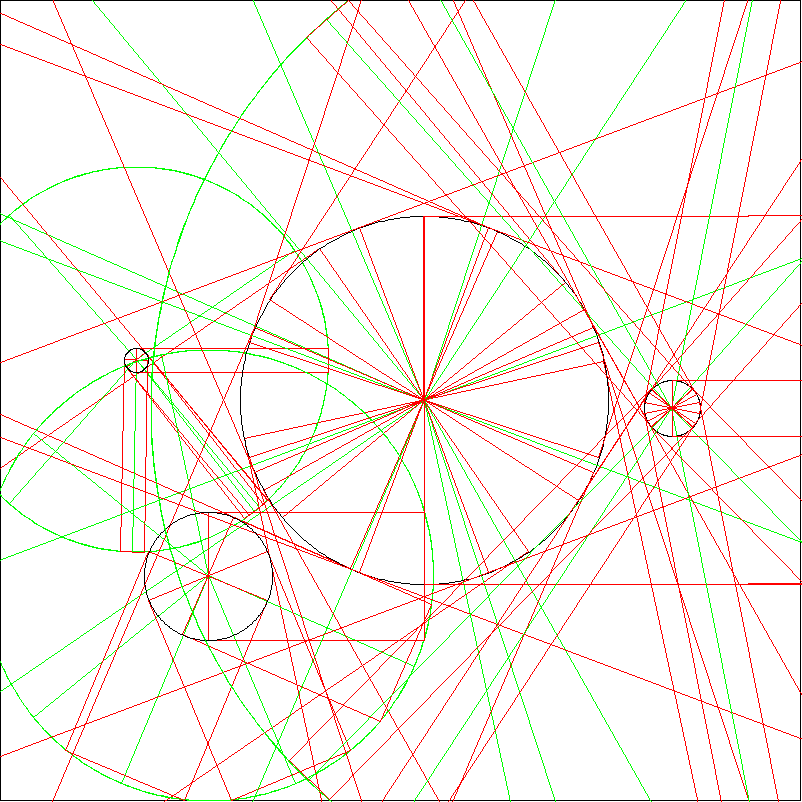

Forest 26
2 tree(s) can be cut



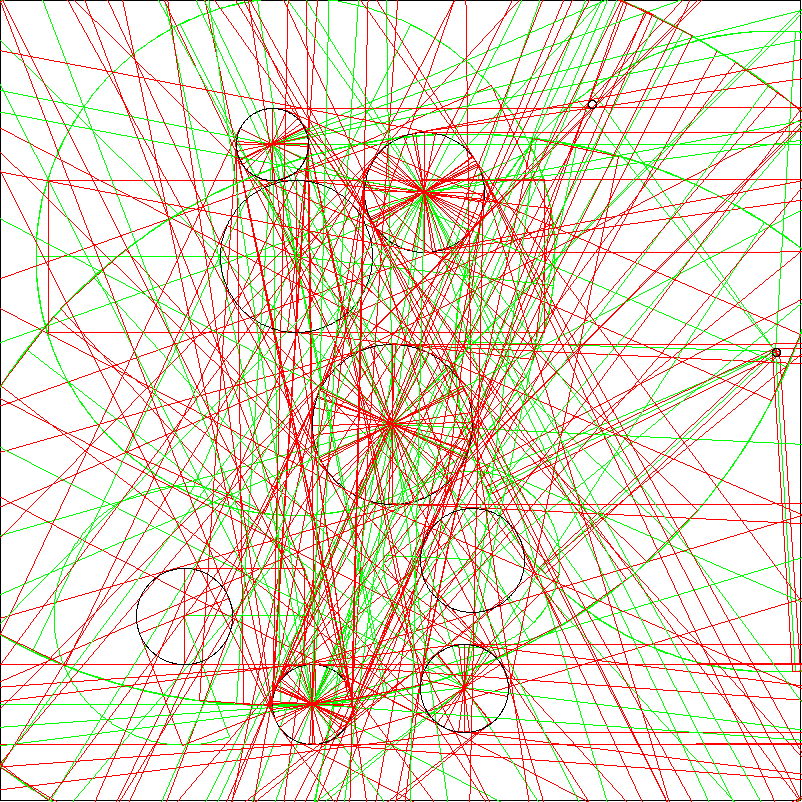

Forest 27
7 tree(s) can be cut



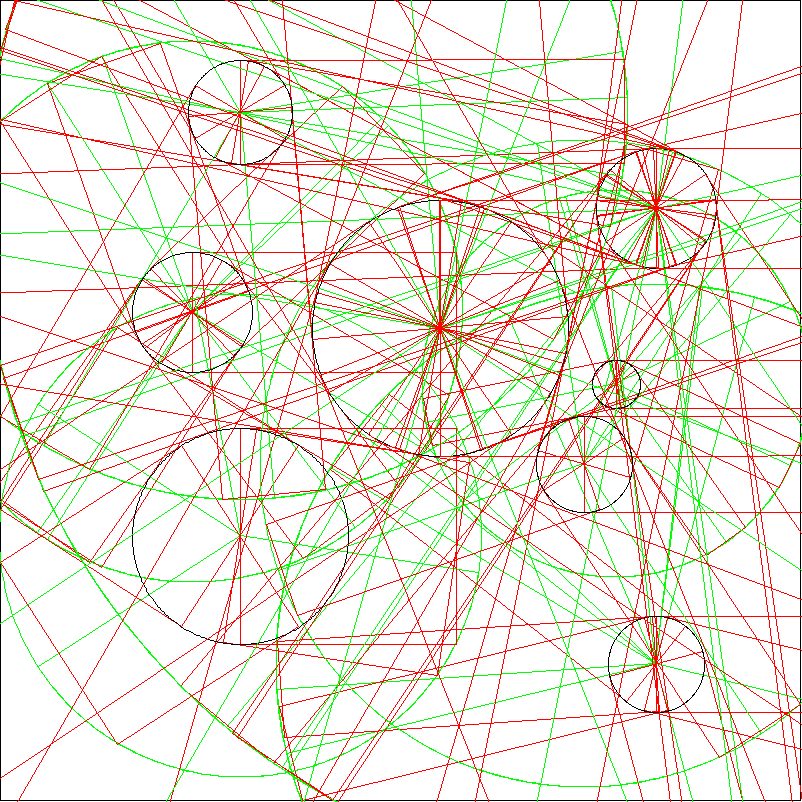

Forest 28
6 tree(s) can be cut



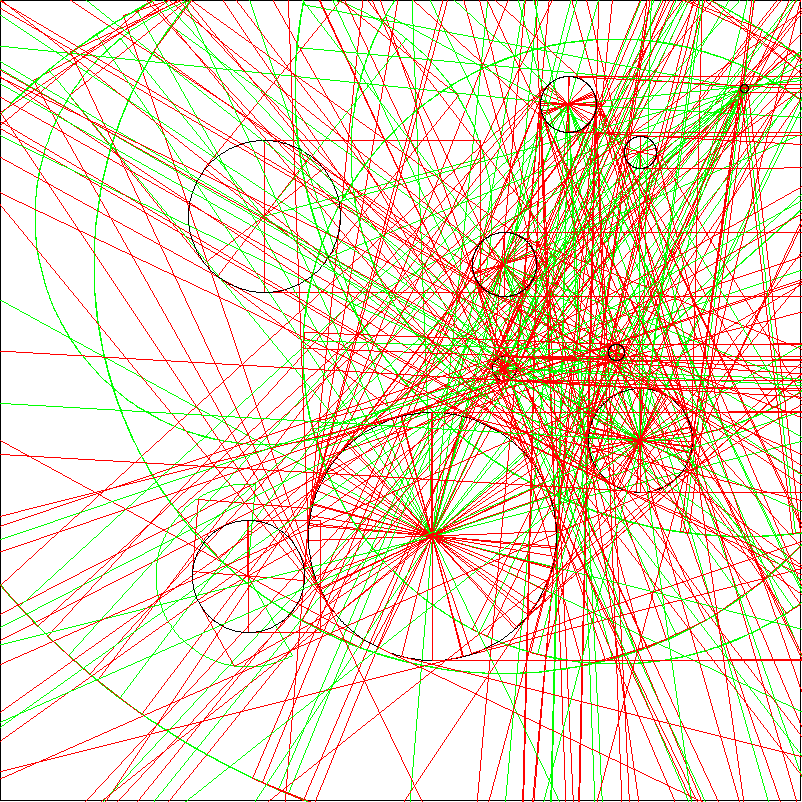

Forest 29
7 tree(s) can be cut



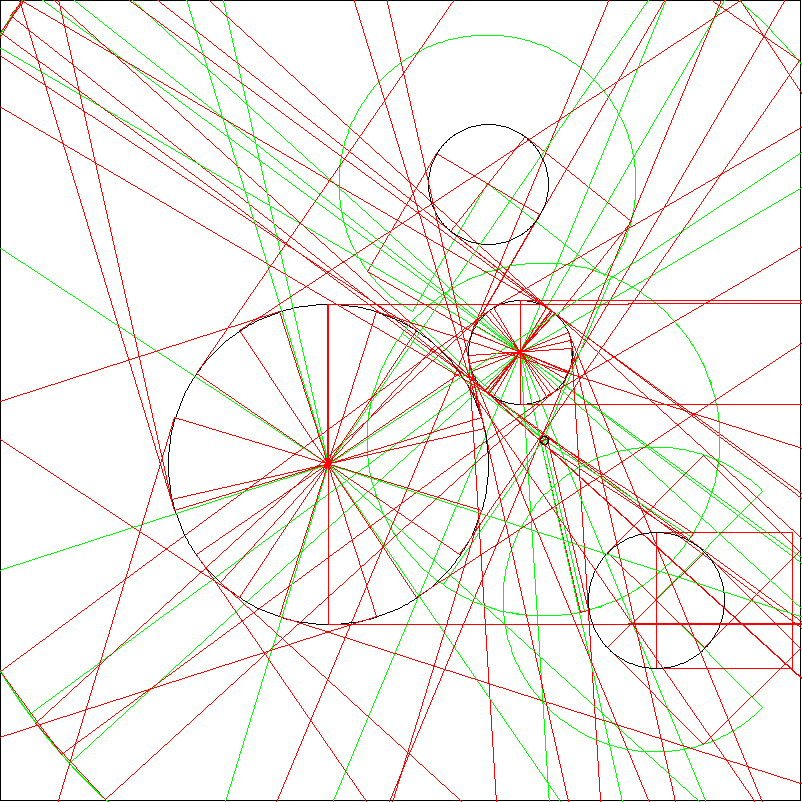

Forest 30
3 tree(s) can be cut



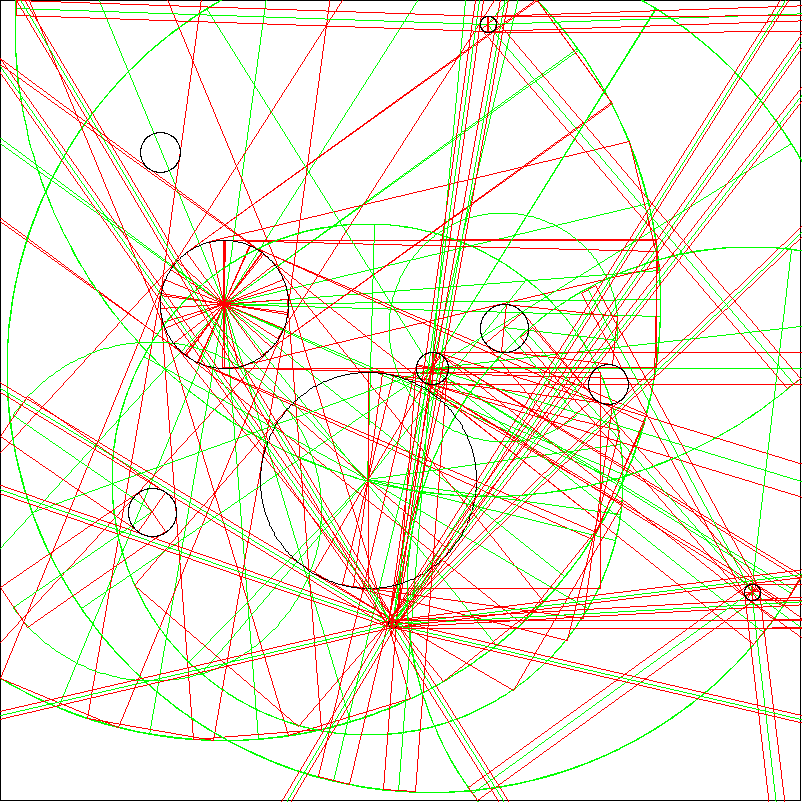

Forest 31
9 tree(s) can be cut



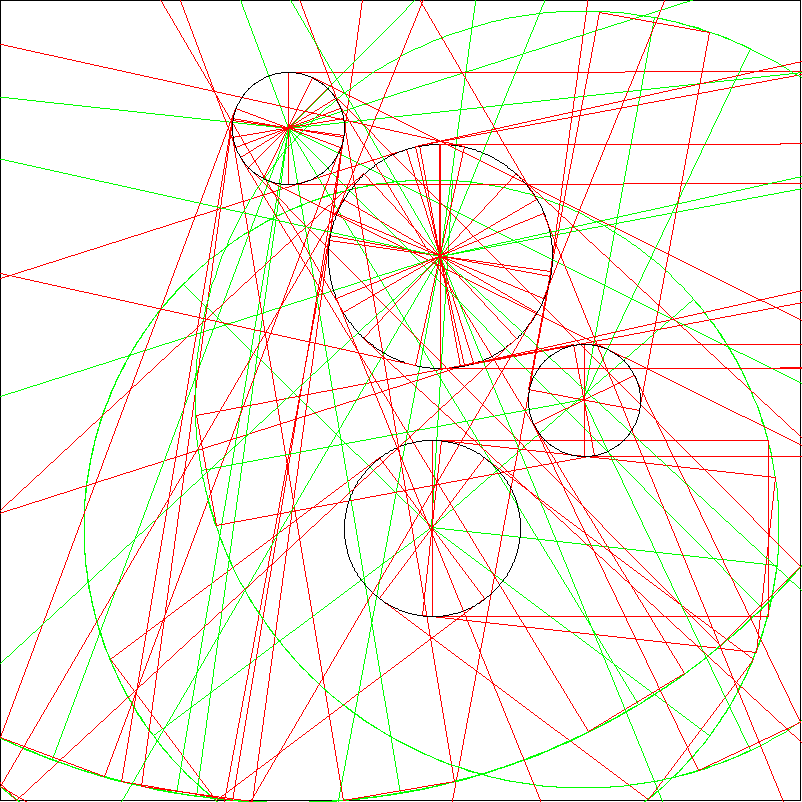

Forest 32
3 tree(s) can be cut



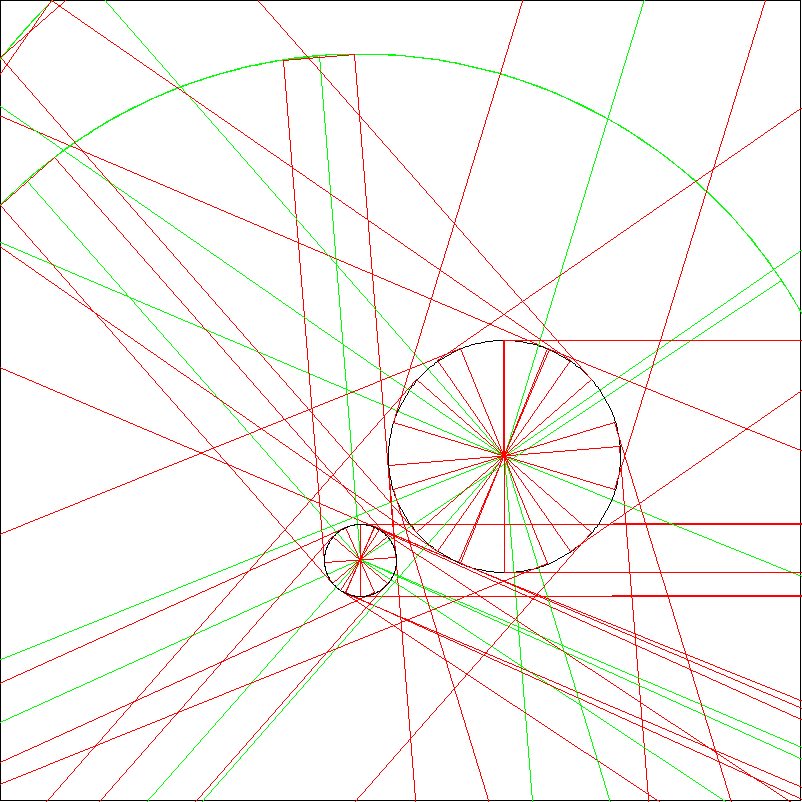

Forest 33
1 tree(s) can be cut



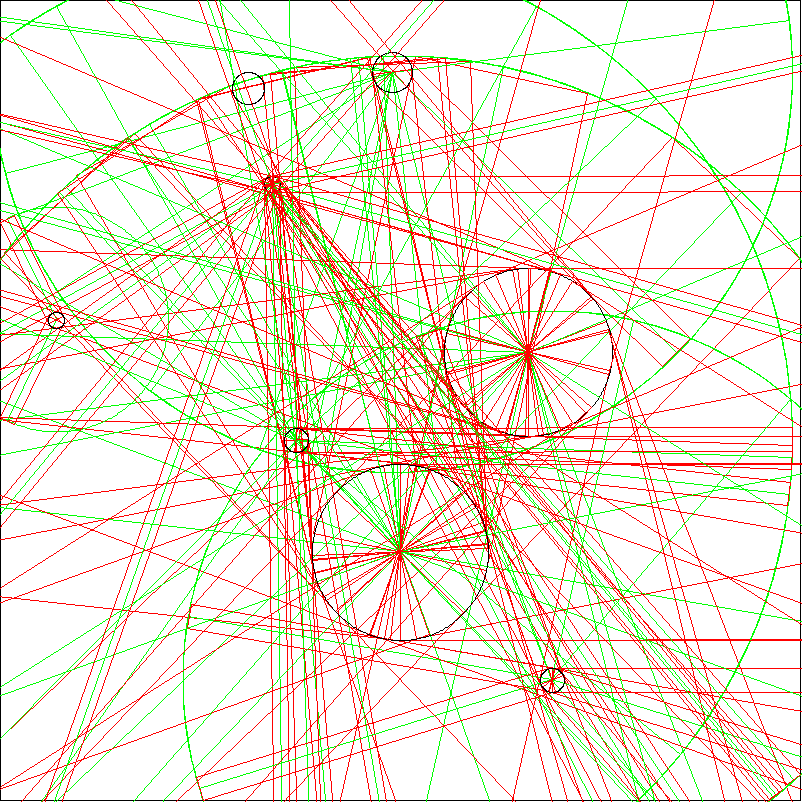

Forest 34
6 tree(s) can be cut



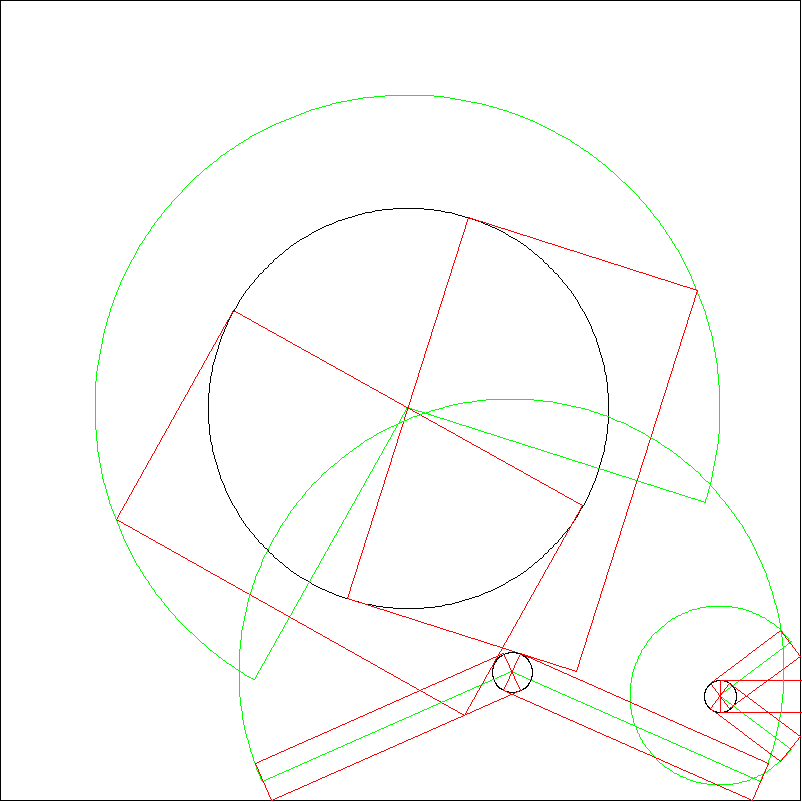

Forest 35
3 tree(s) can be cut



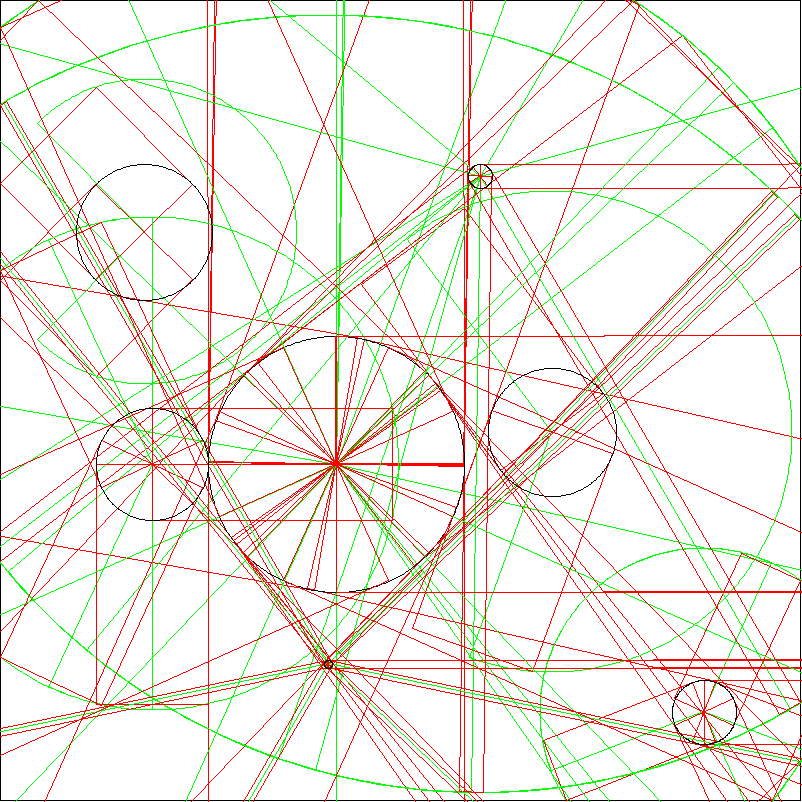

Forest 36
6 tree(s) can be cut



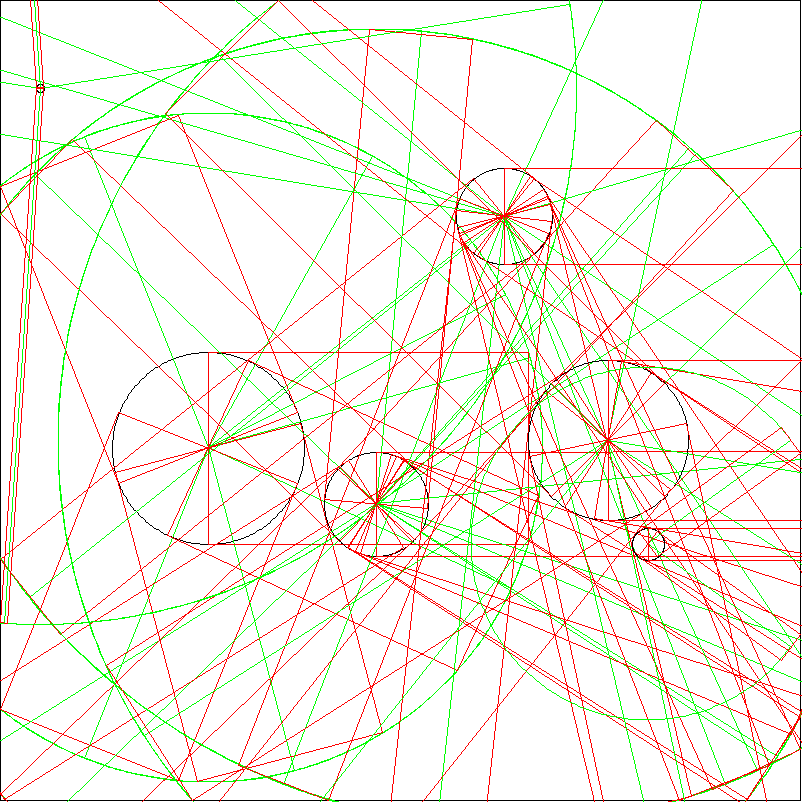

Forest 37
6 tree(s) can be cut



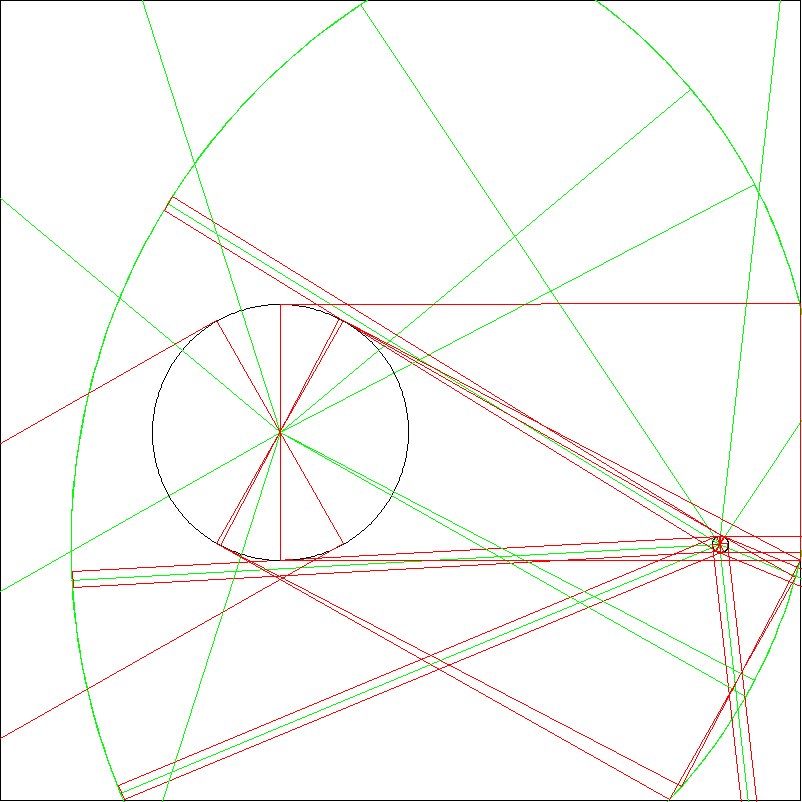

Forest 38
2 tree(s) can be cut



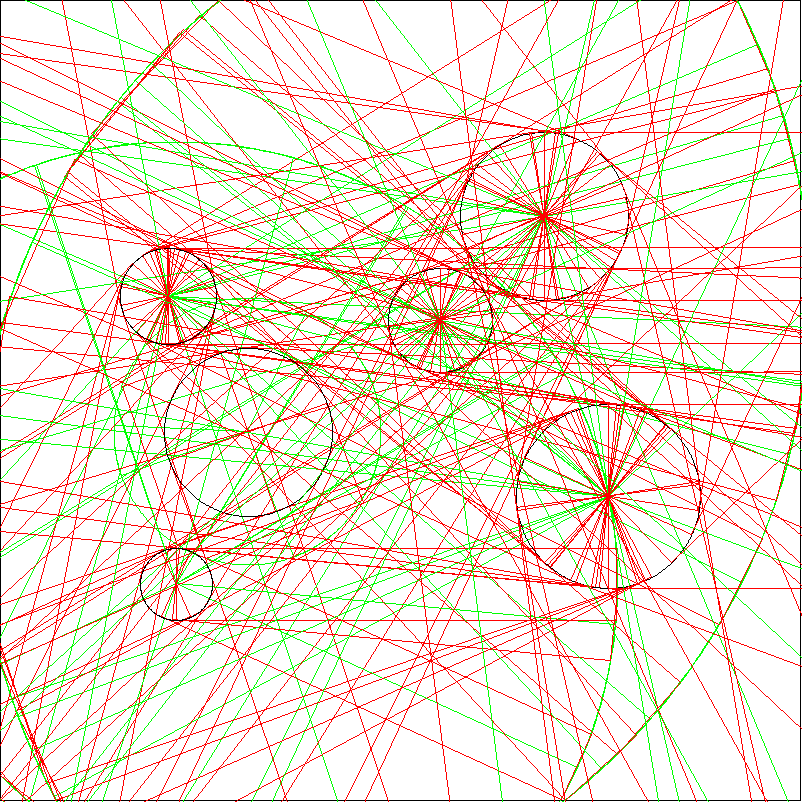

Forest 39
3 tree(s) can be cut



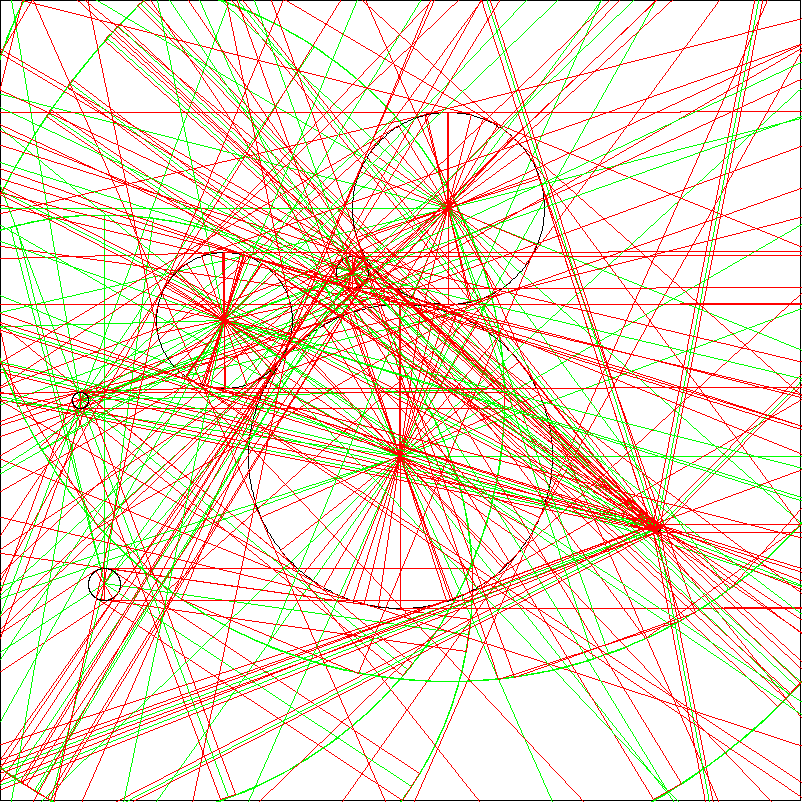

Forest 40
2 tree(s) can be cut



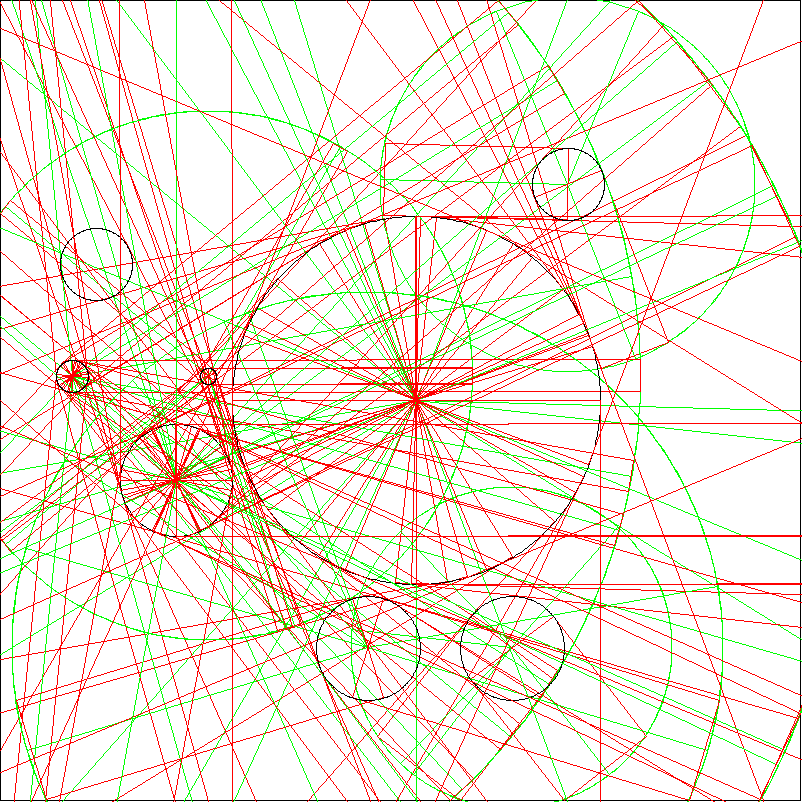

Forest 41
6 tree(s) can be cut



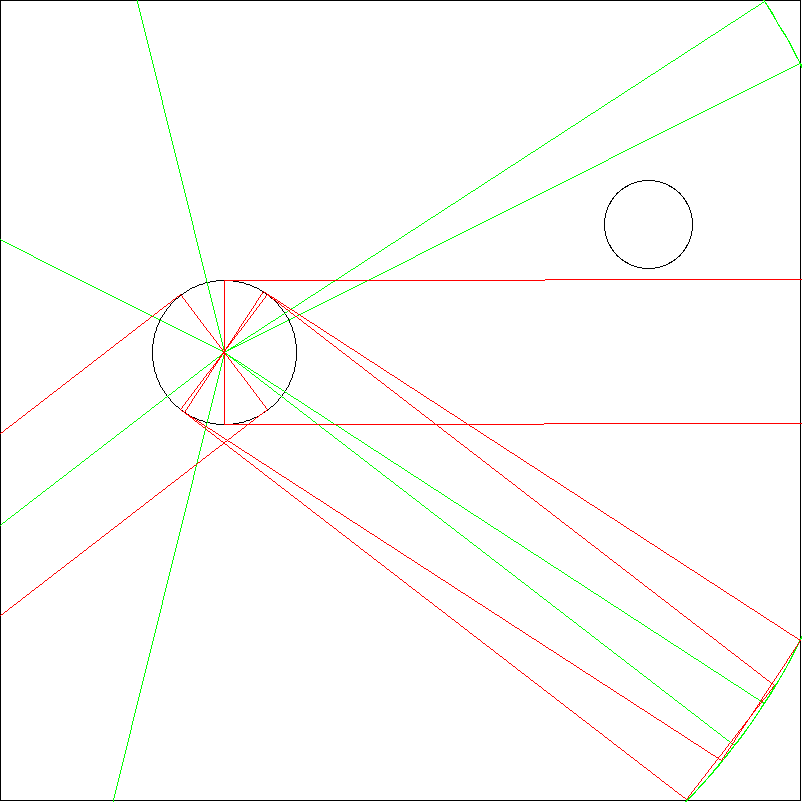

Forest 42
2 tree(s) can be cut



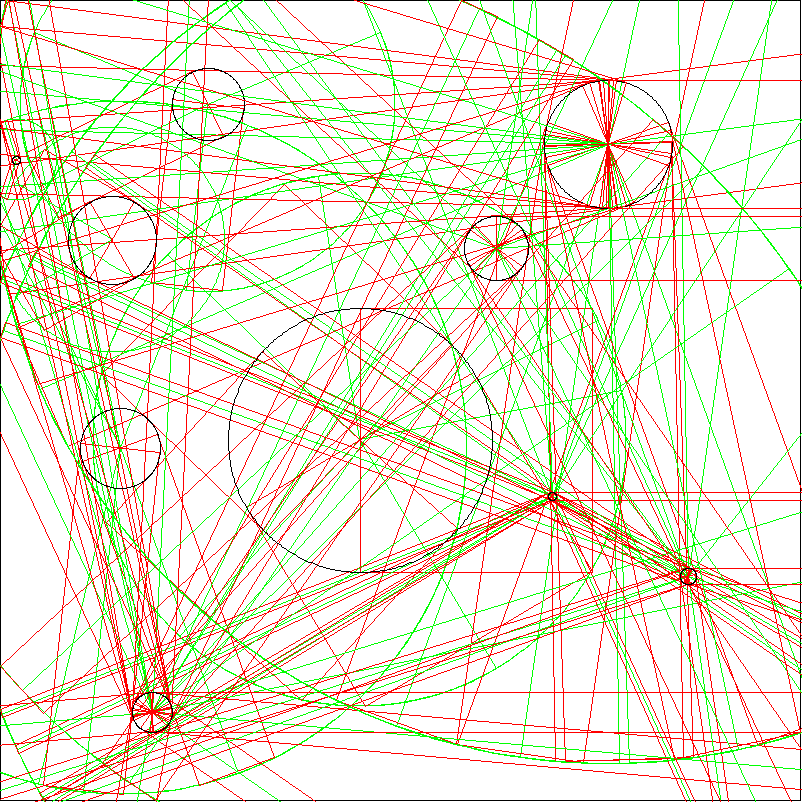

Forest 43
10 tree(s) can be cut



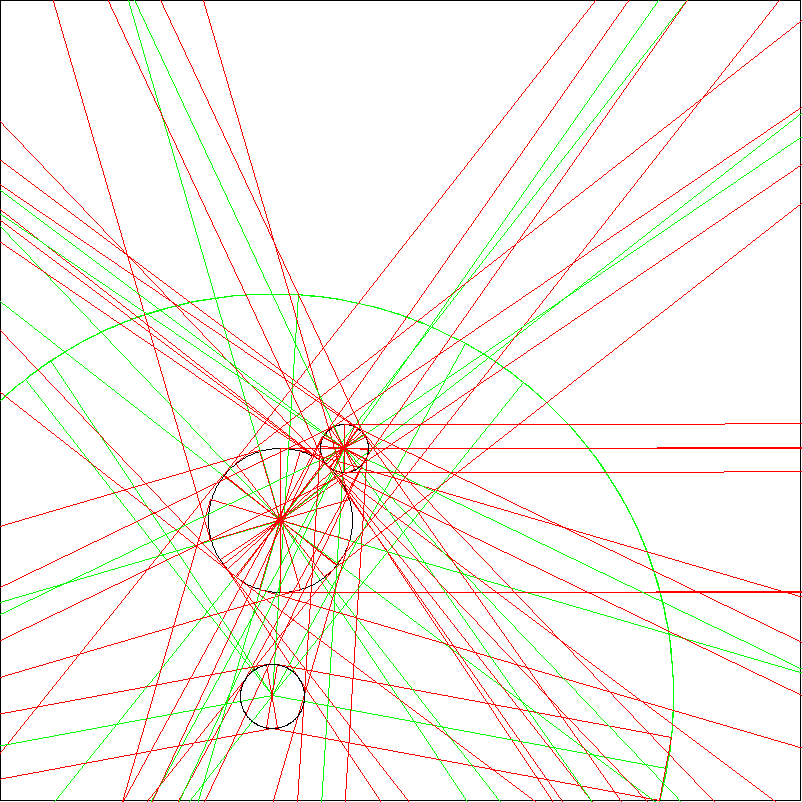

Forest 44
1 tree(s) can be cut



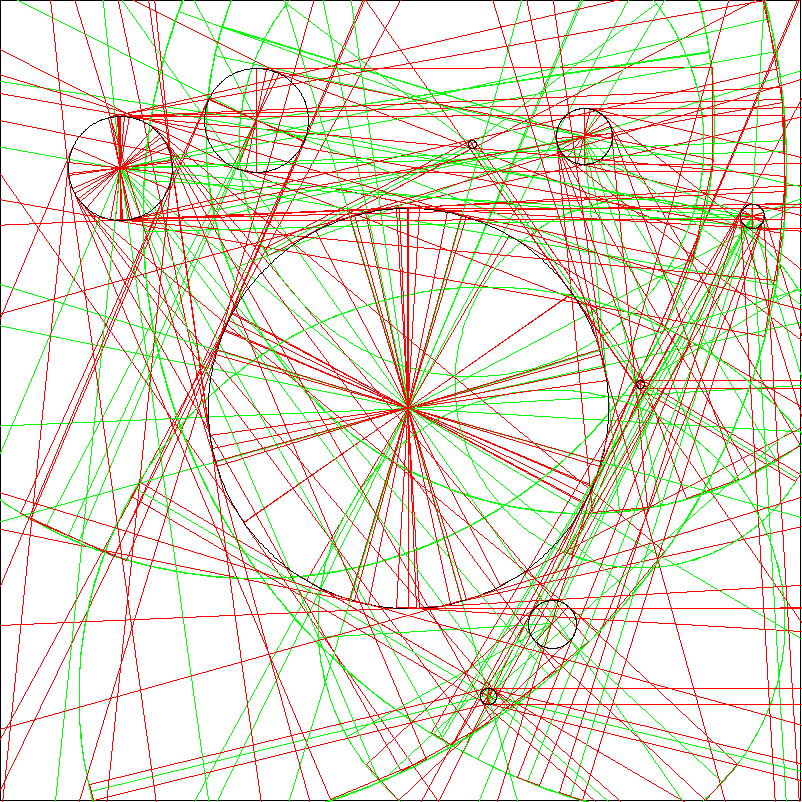

Forest 45
8 tree(s) can be cut



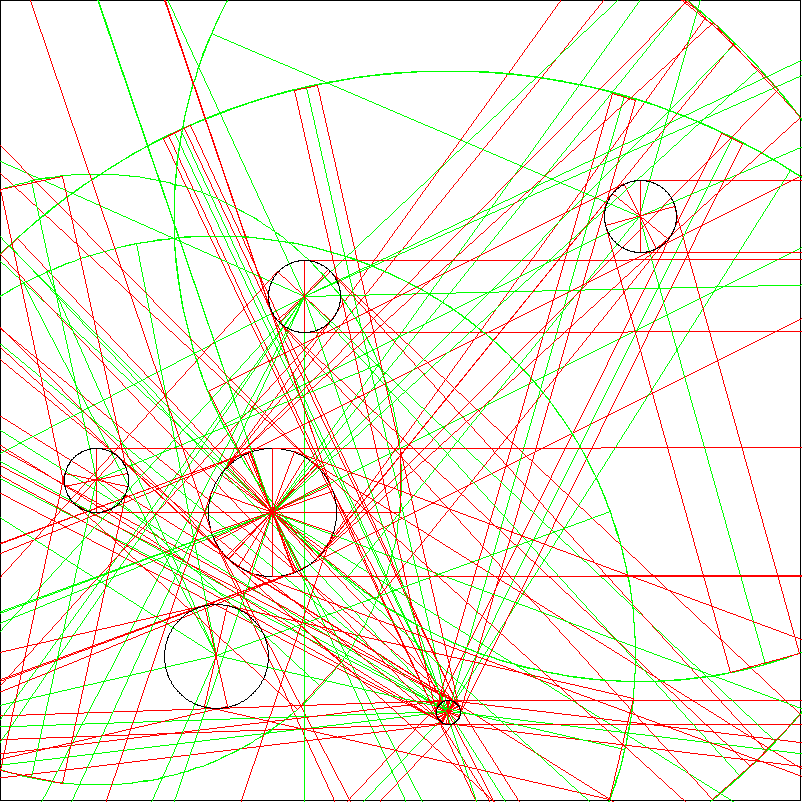

Forest 46
6 tree(s) can be cut



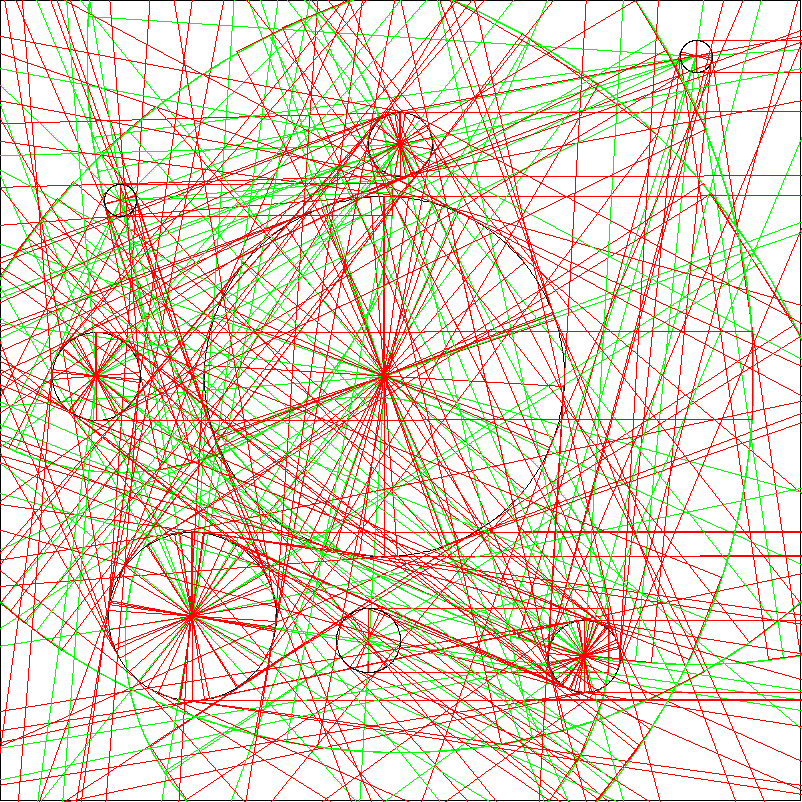

Forest 47
3 tree(s) can be cut



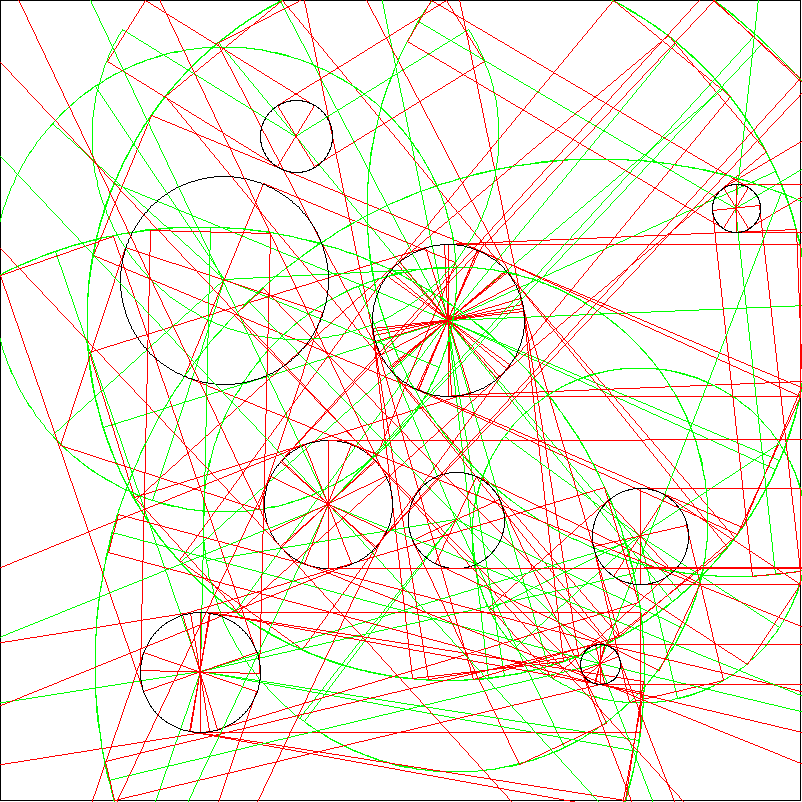

Forest 48
8 tree(s) can be cut



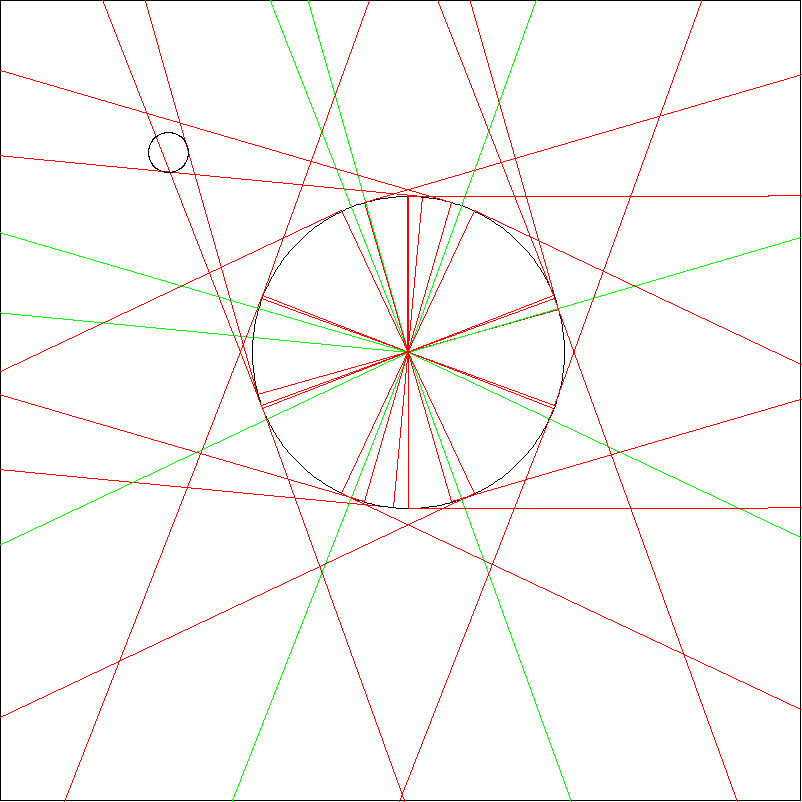

Forest 49
1 tree(s) can be cut



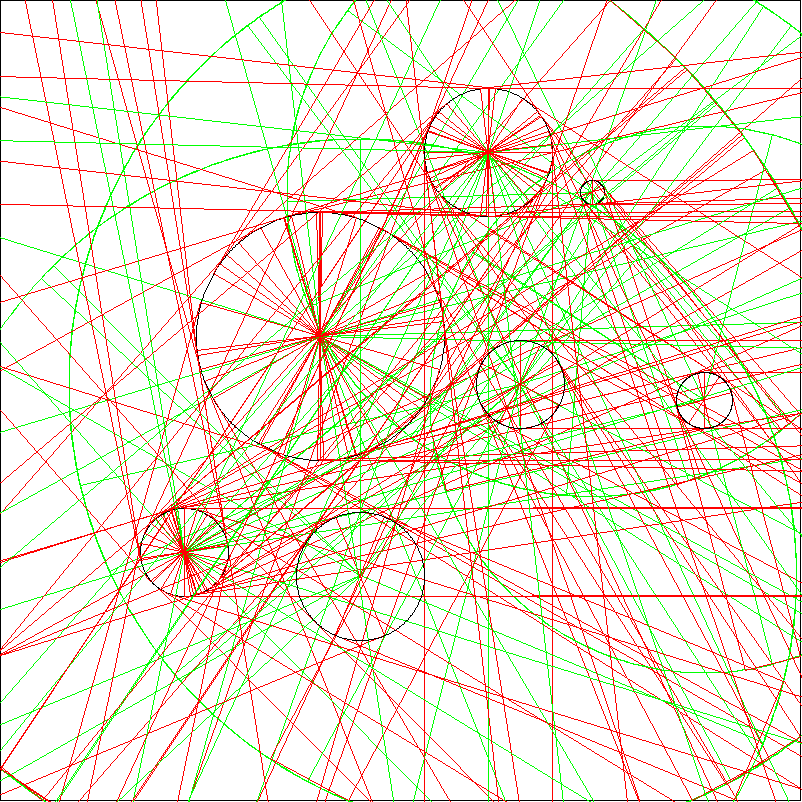

Forest 50
4 tree(s) can be cut



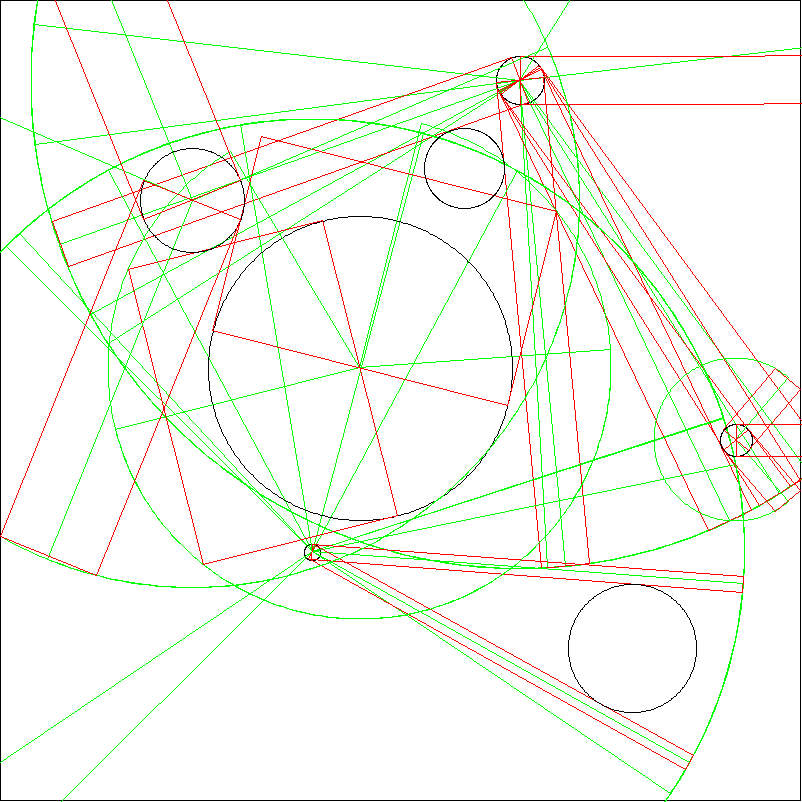

Forest 51
7 tree(s) can be cut



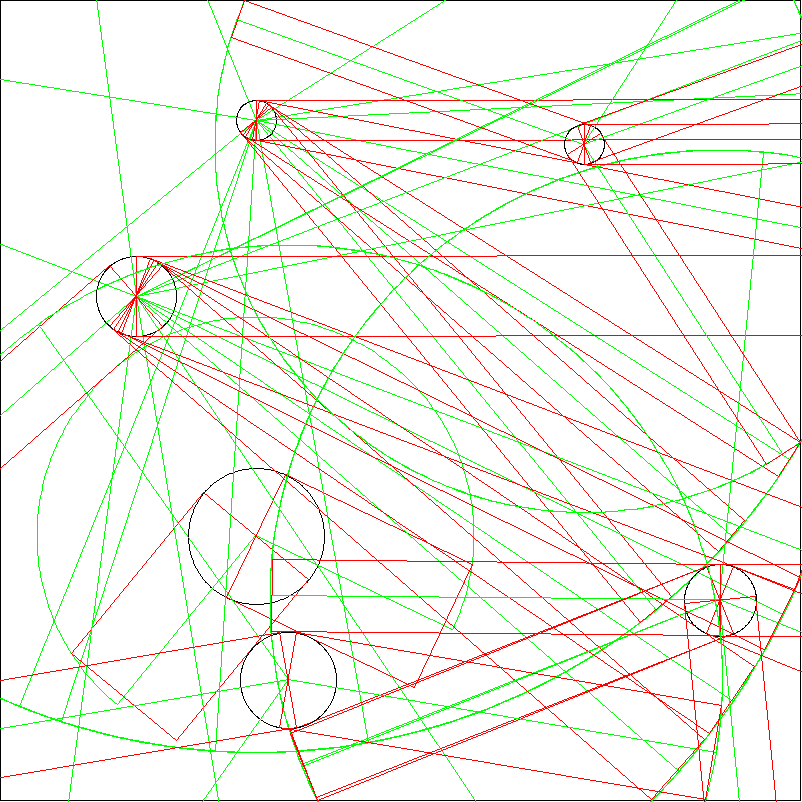

Forest 52
6 tree(s) can be cut



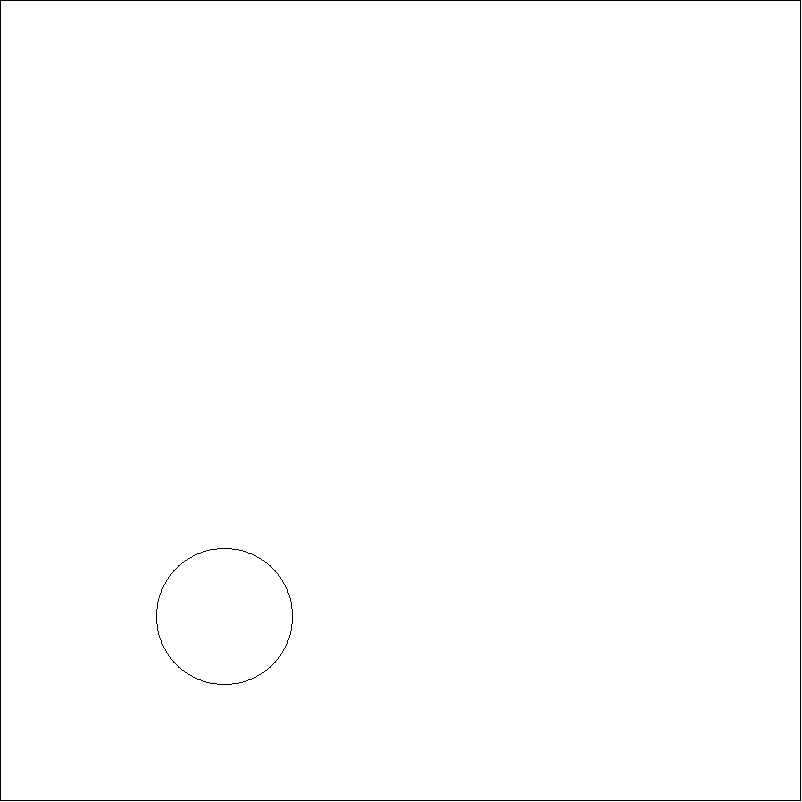

Forest 53
1 tree(s) can be cut



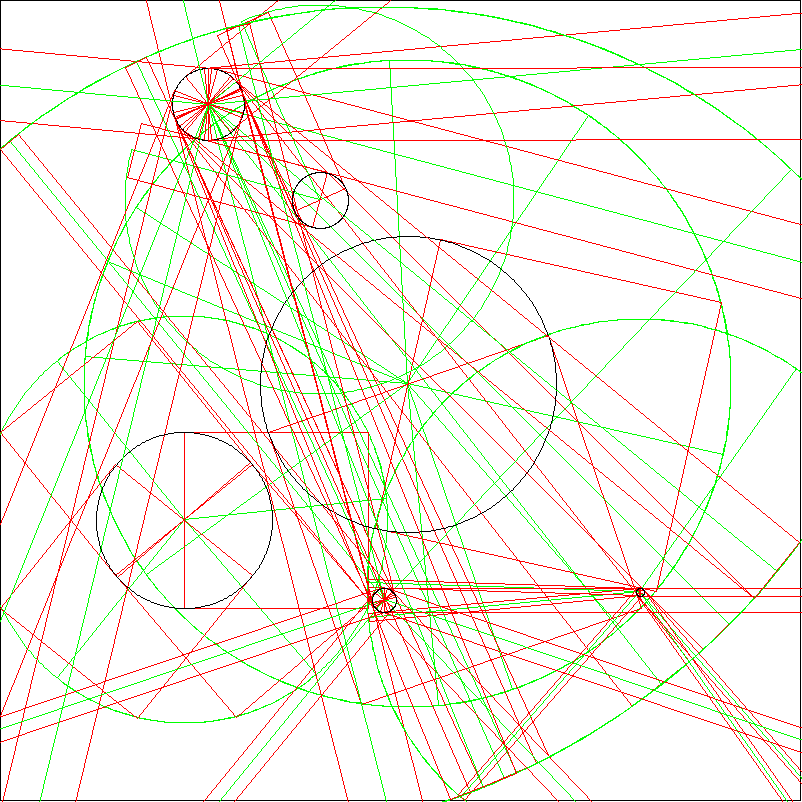

Forest 54
6 tree(s) can be cut



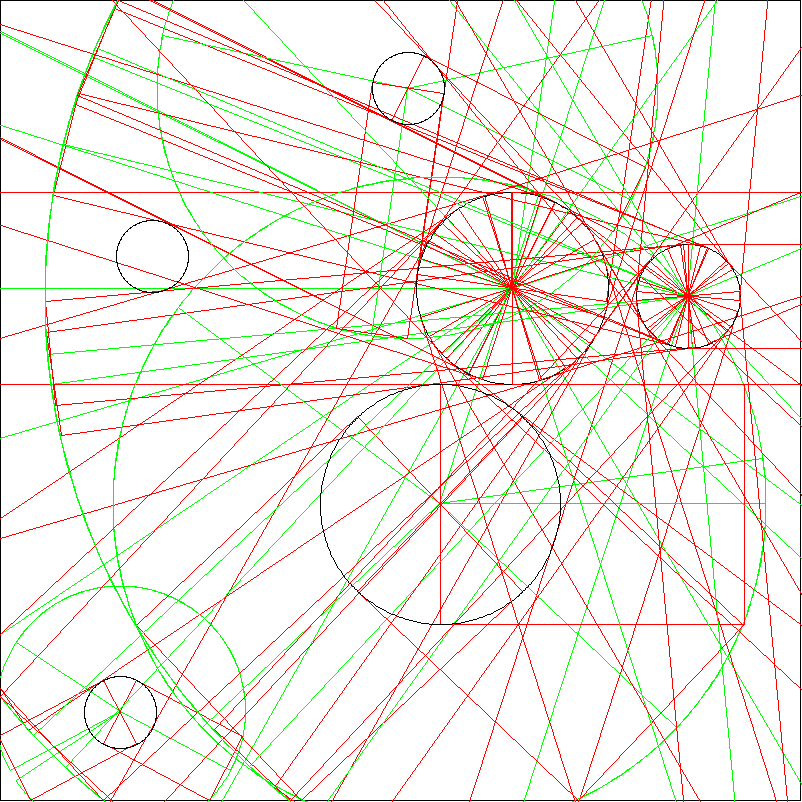

Forest 55
4 tree(s) can be cut



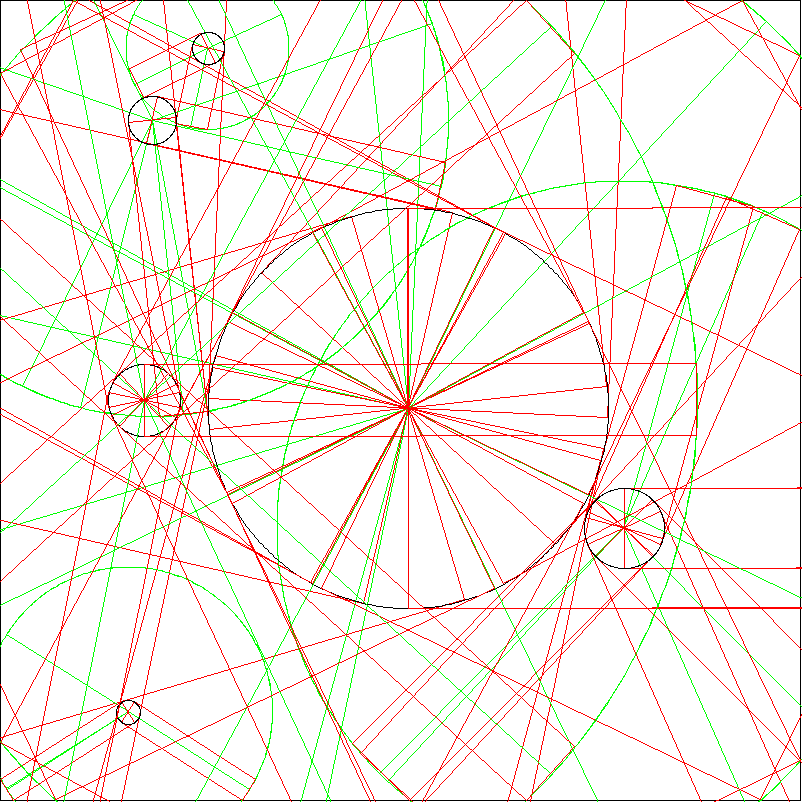

Forest 56
4 tree(s) can be cut



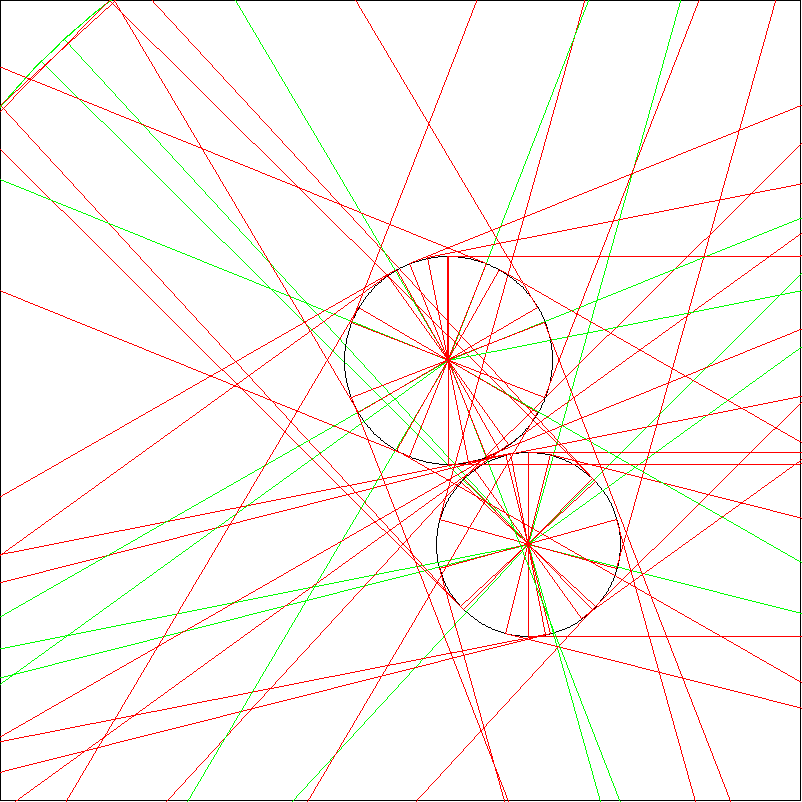

Forest 57
0 tree(s) can be cut



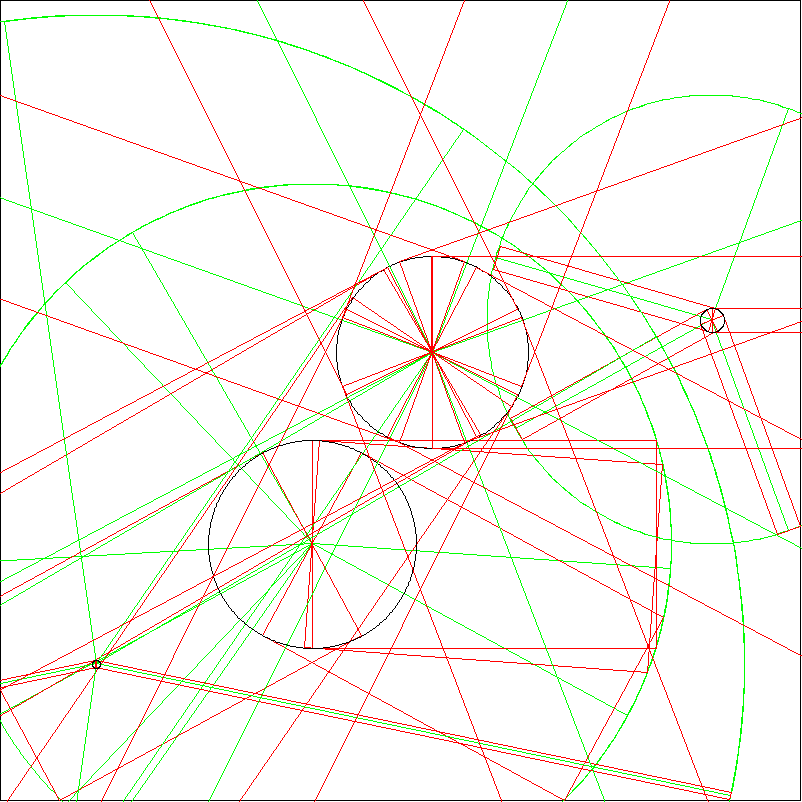

Forest 58
3 tree(s) can be cut



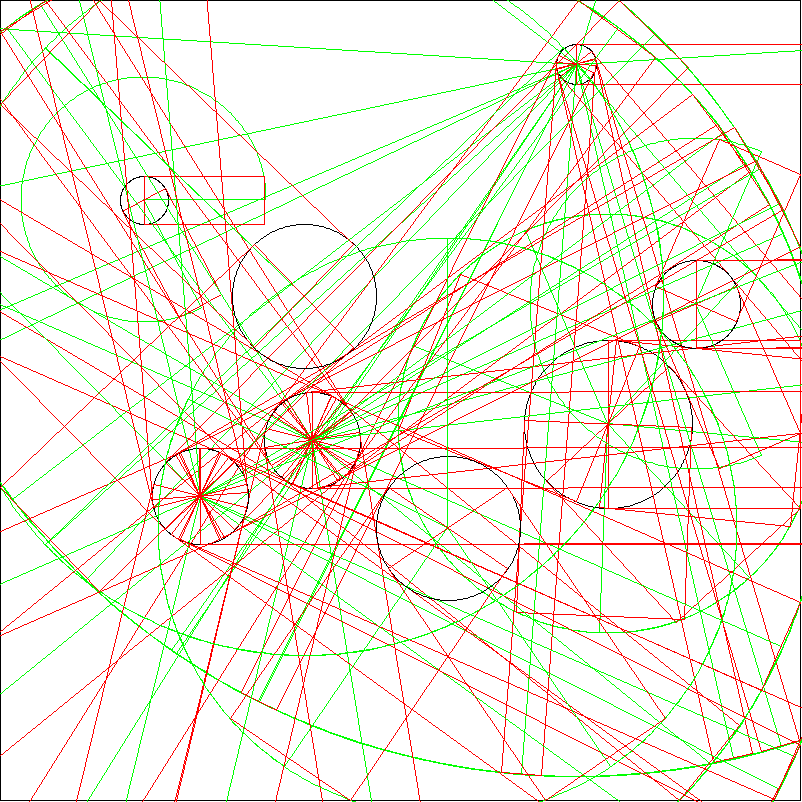

Forest 59
8 tree(s) can be cut



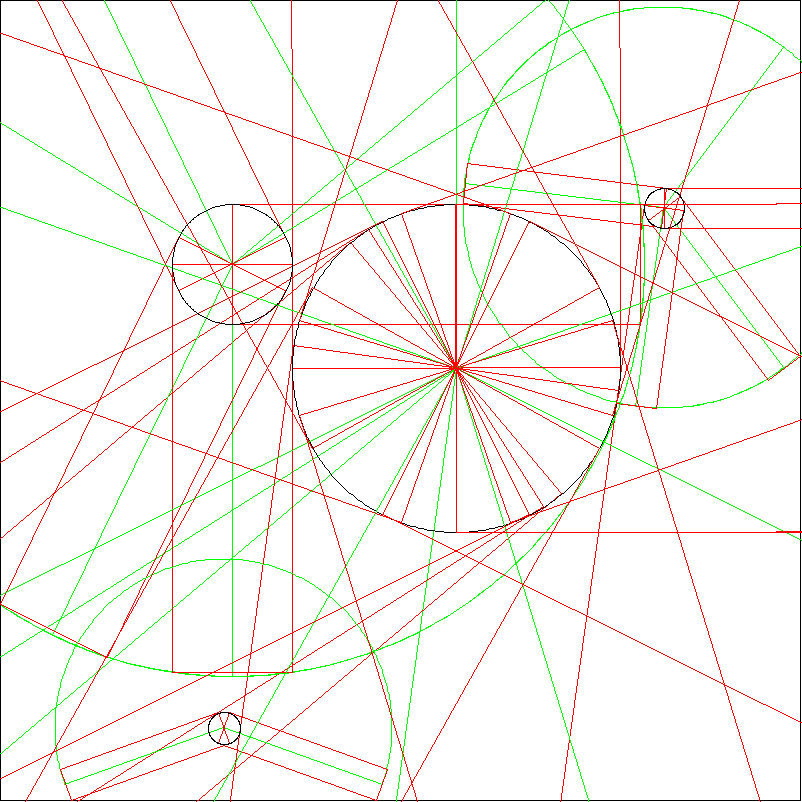

Forest 60
3 tree(s) can be cut



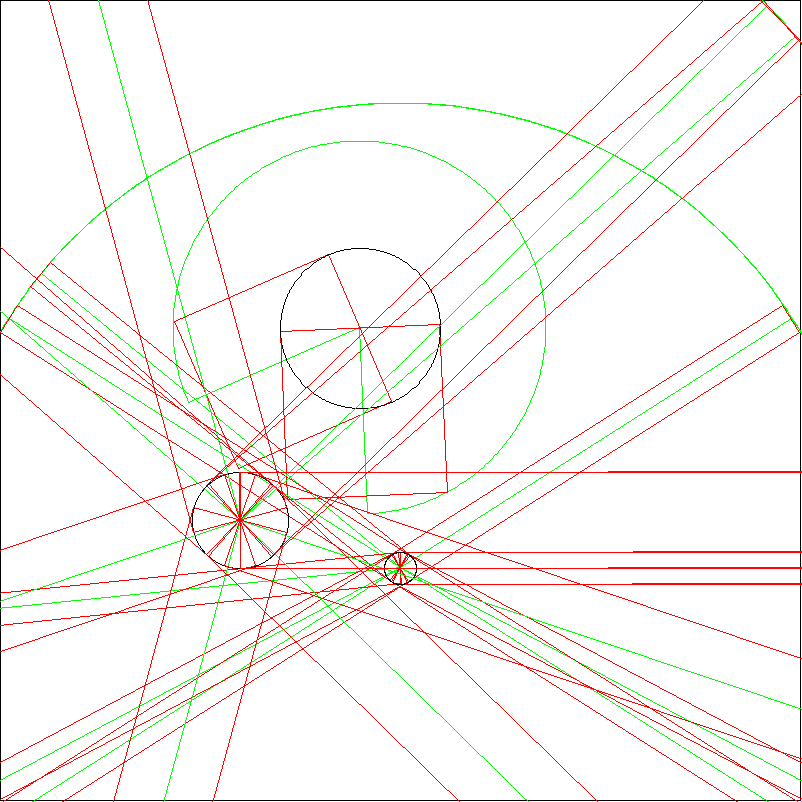

Forest 61
2 tree(s) can be cut



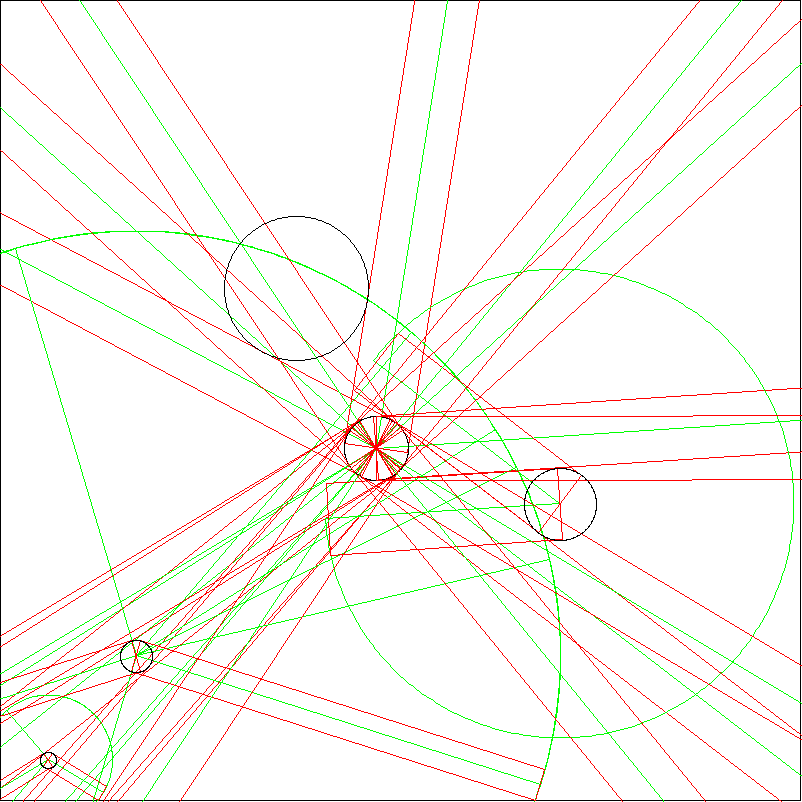

Forest 62
4 tree(s) can be cut



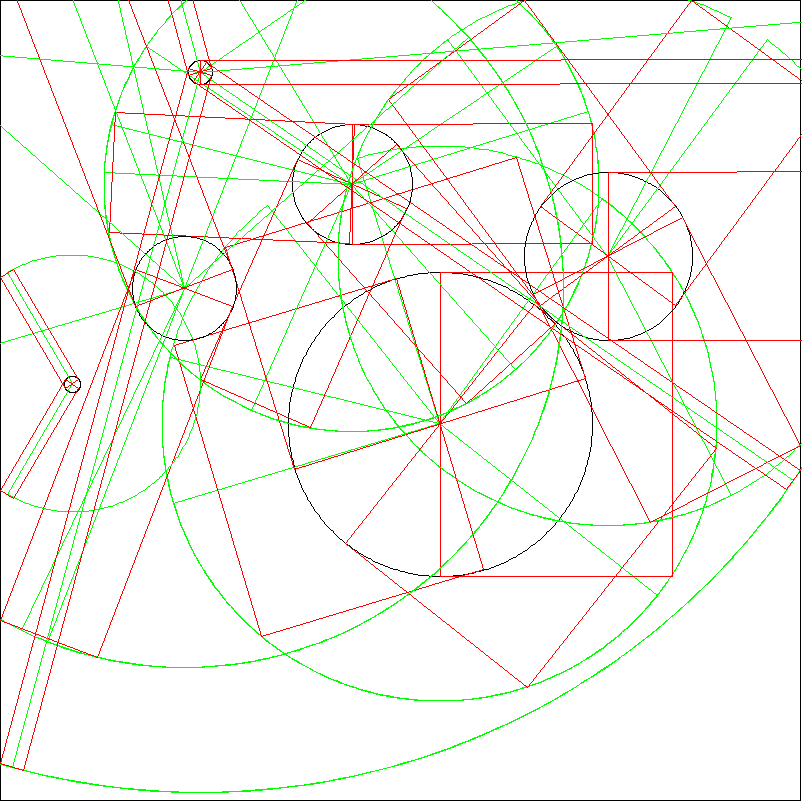

Forest 63
6 tree(s) can be cut



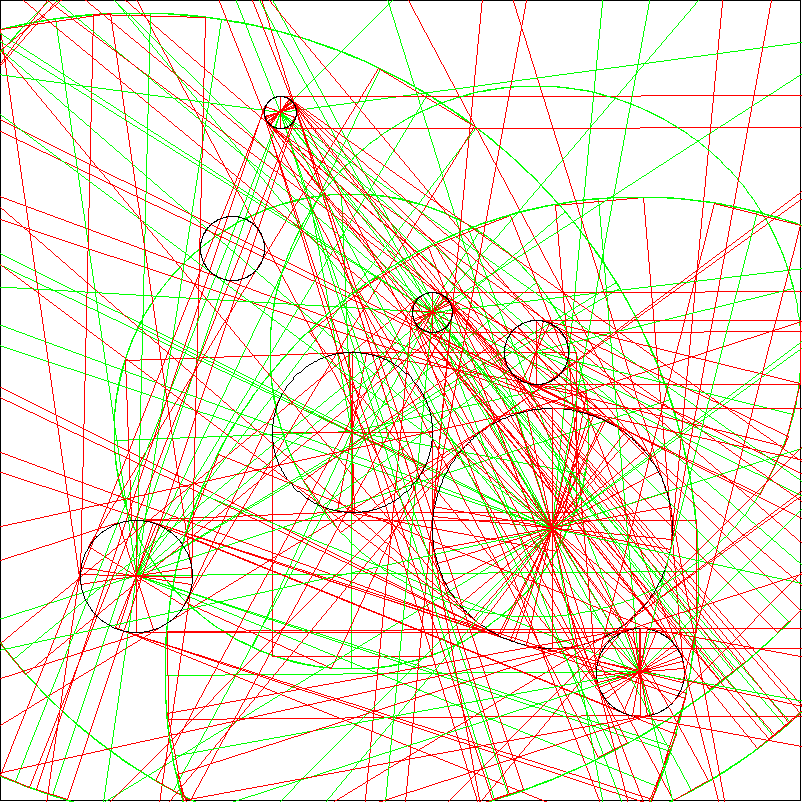

Forest 64
6 tree(s) can be cut



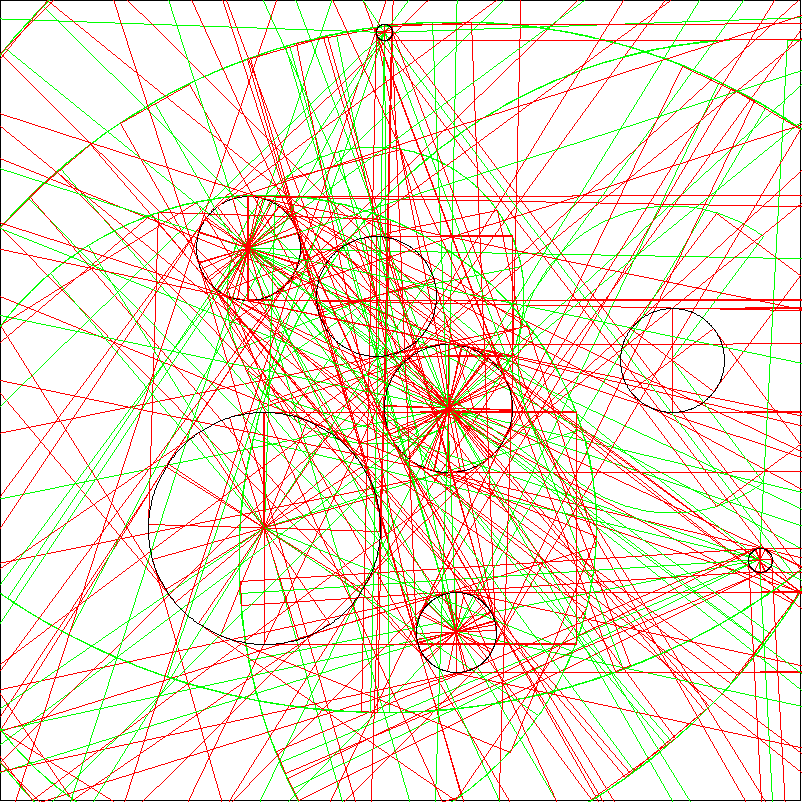

Forest 65
6 tree(s) can be cut



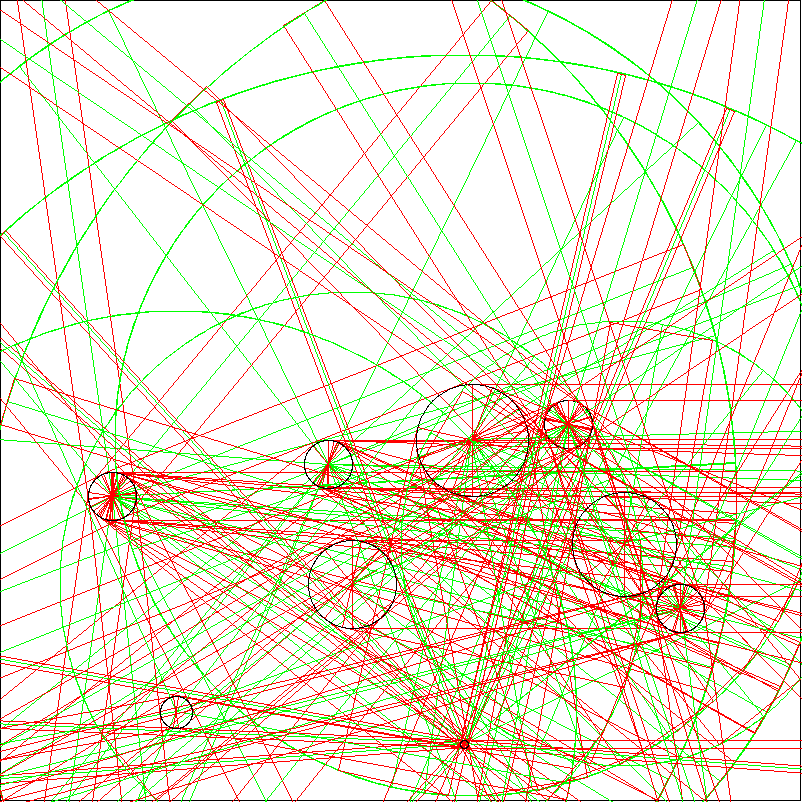

Forest 66
8 tree(s) can be cut



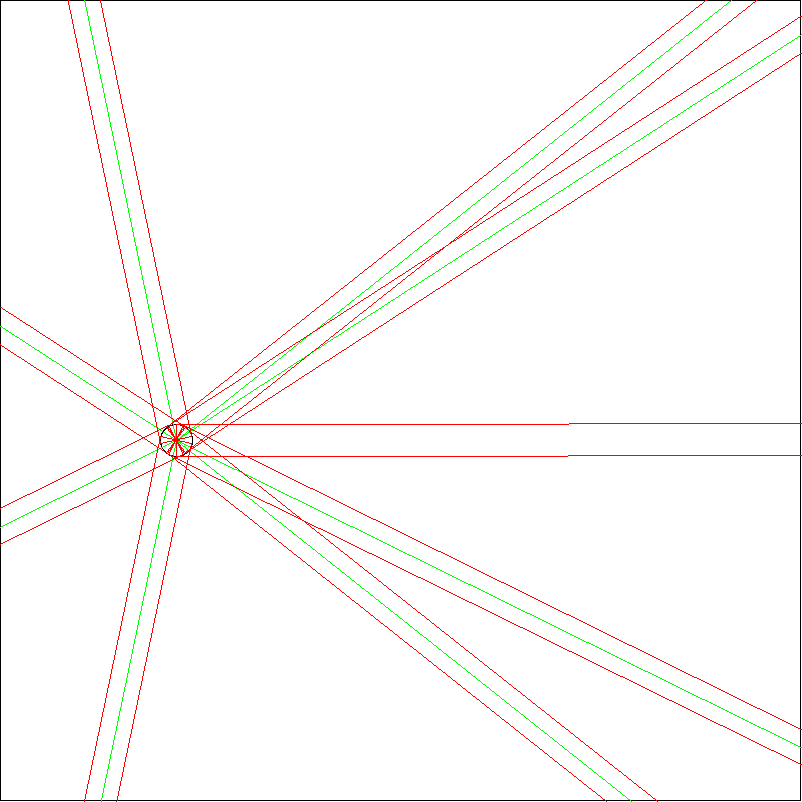

Forest 67
0 tree(s) can be cut



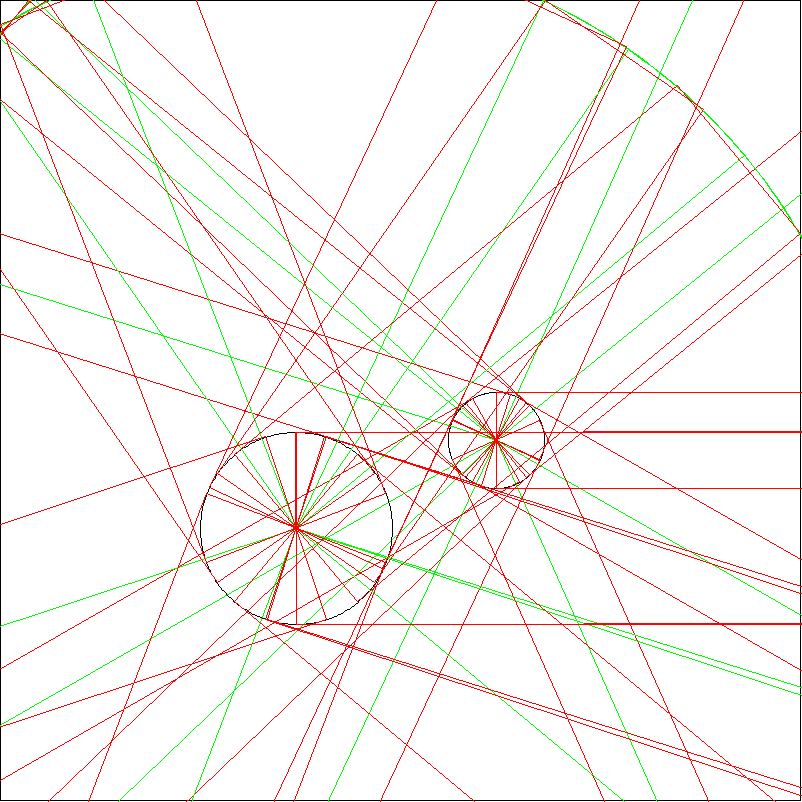

Forest 68
0 tree(s) can be cut



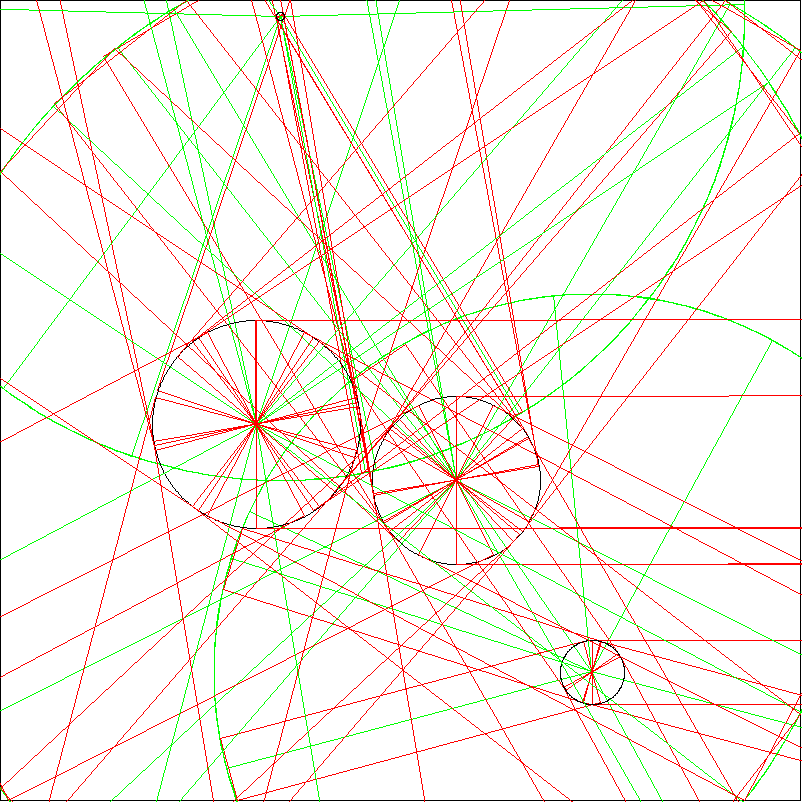

Forest 69
2 tree(s) can be cut



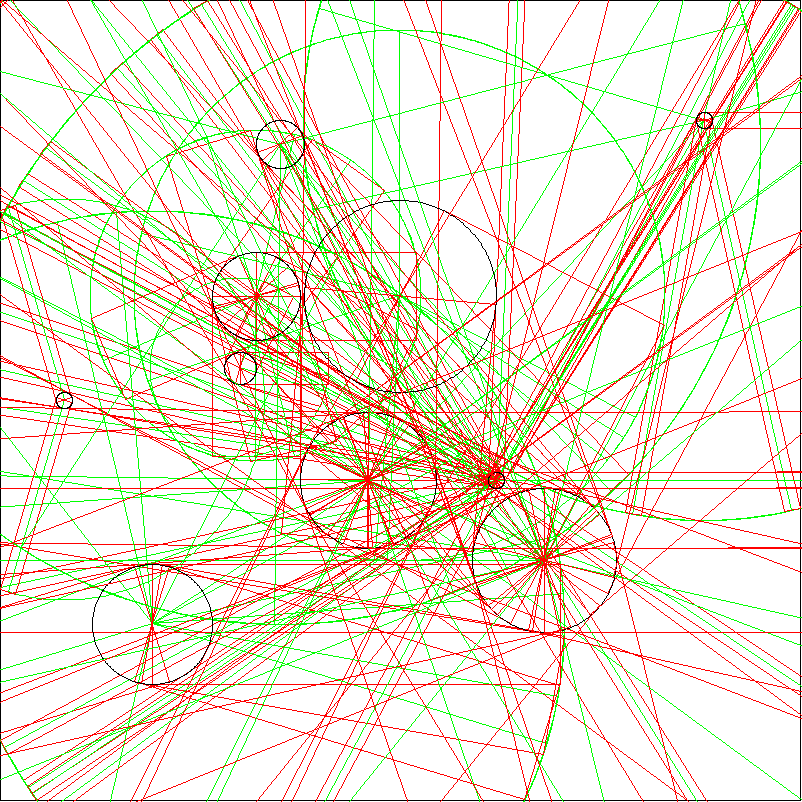

Forest 70
8 tree(s) can be cut



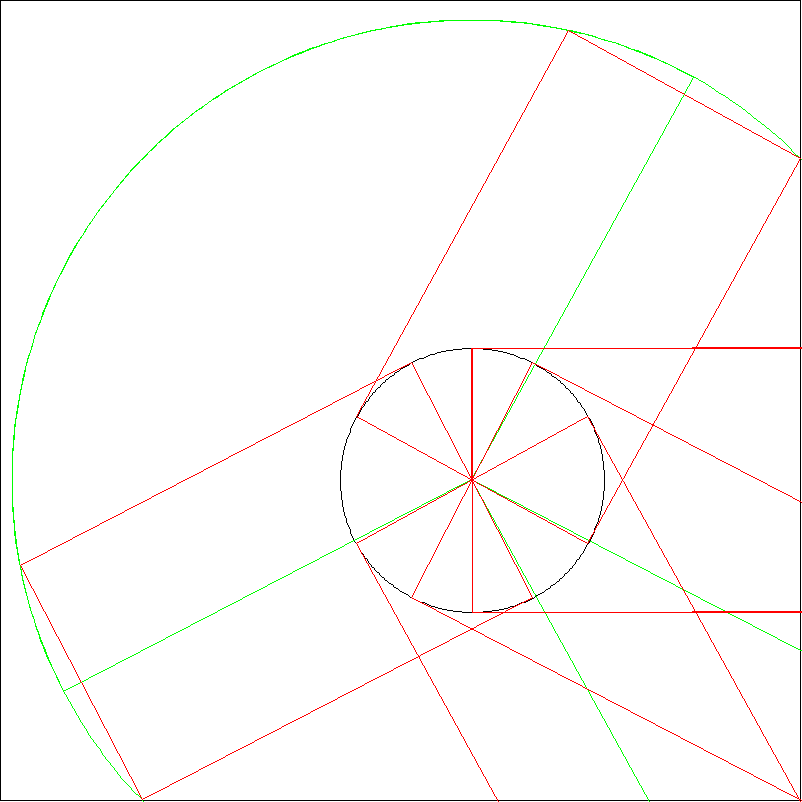

Forest 71
1 tree(s) can be cut



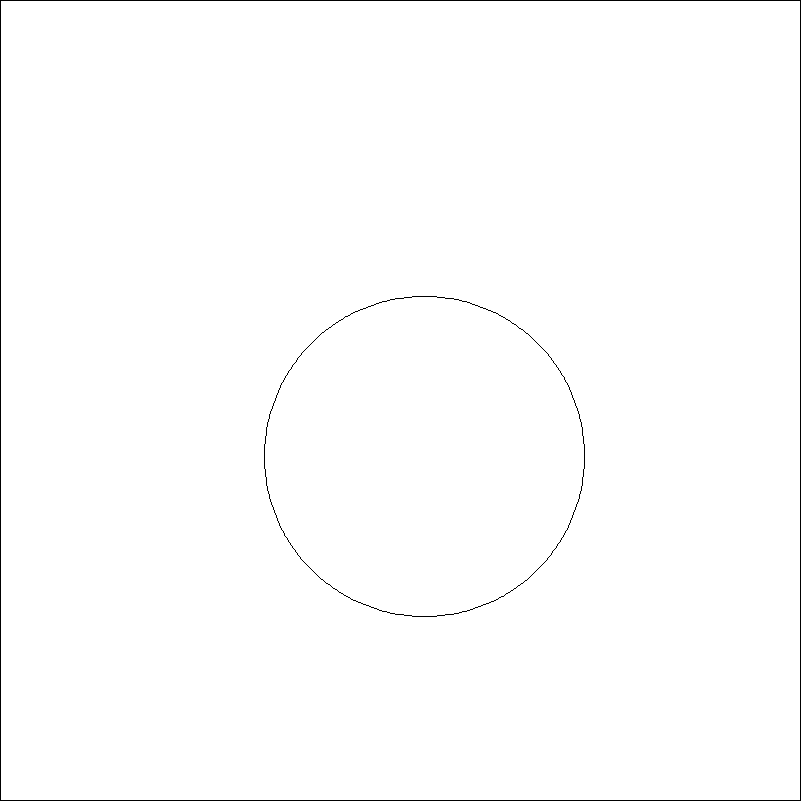

Forest 72
1 tree(s) can be cut



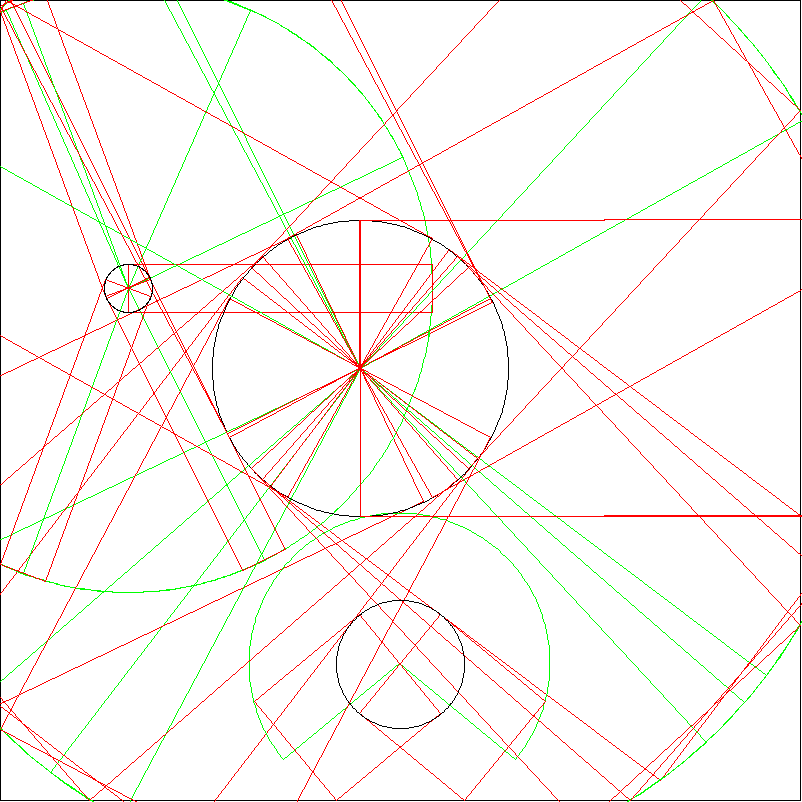

Forest 73
2 tree(s) can be cut



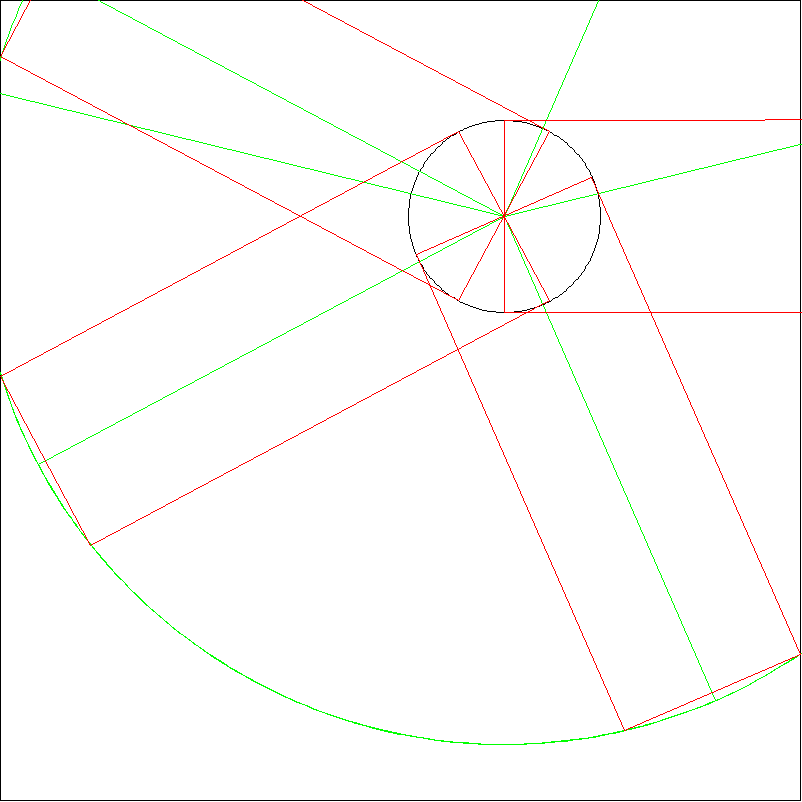

Forest 74
1 tree(s) can be cut



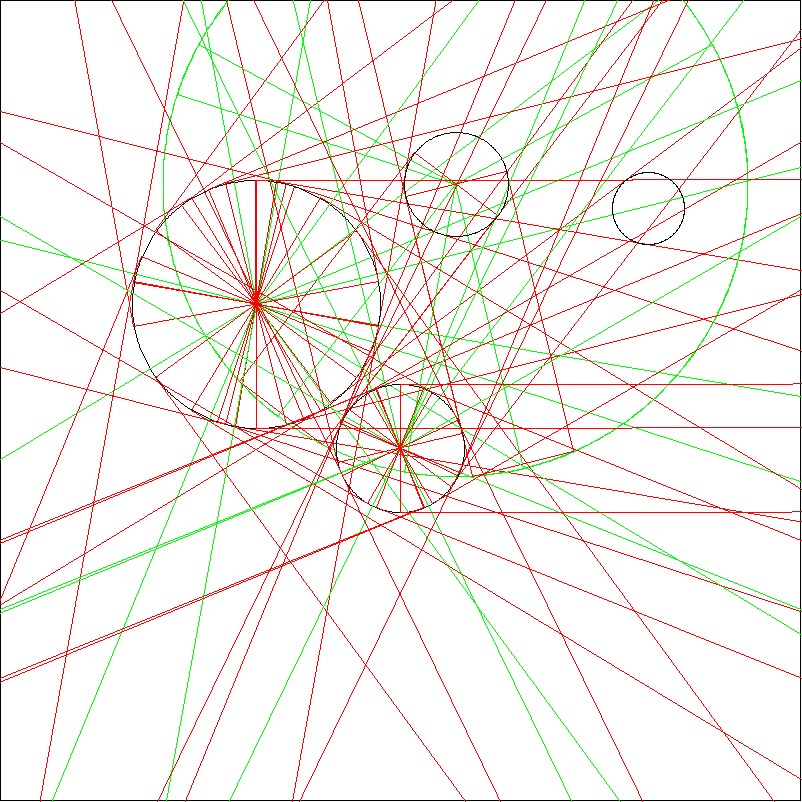

Forest 75
2 tree(s) can be cut



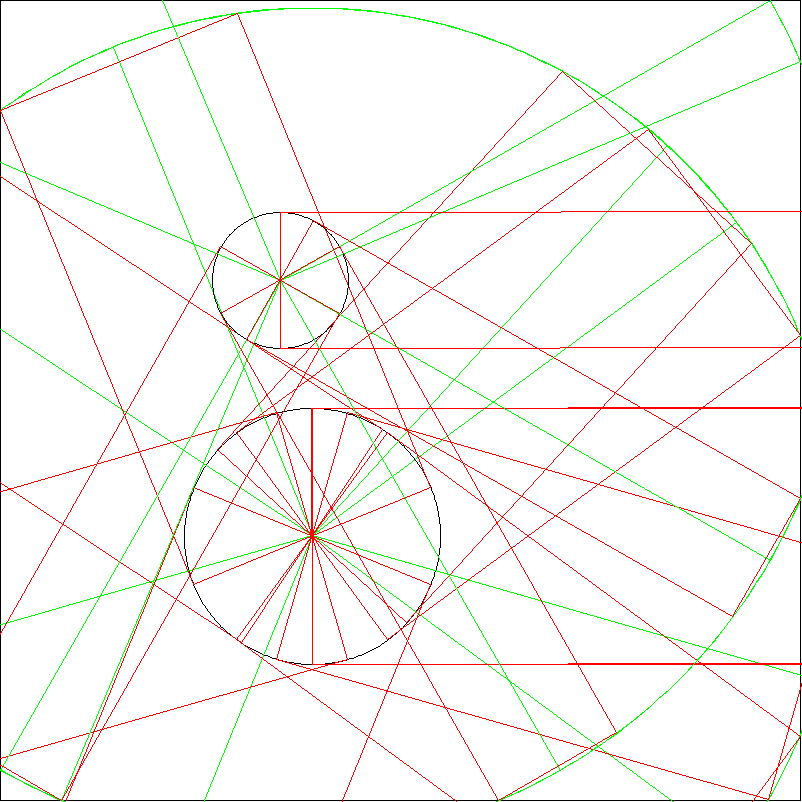

Forest 76
2 tree(s) can be cut



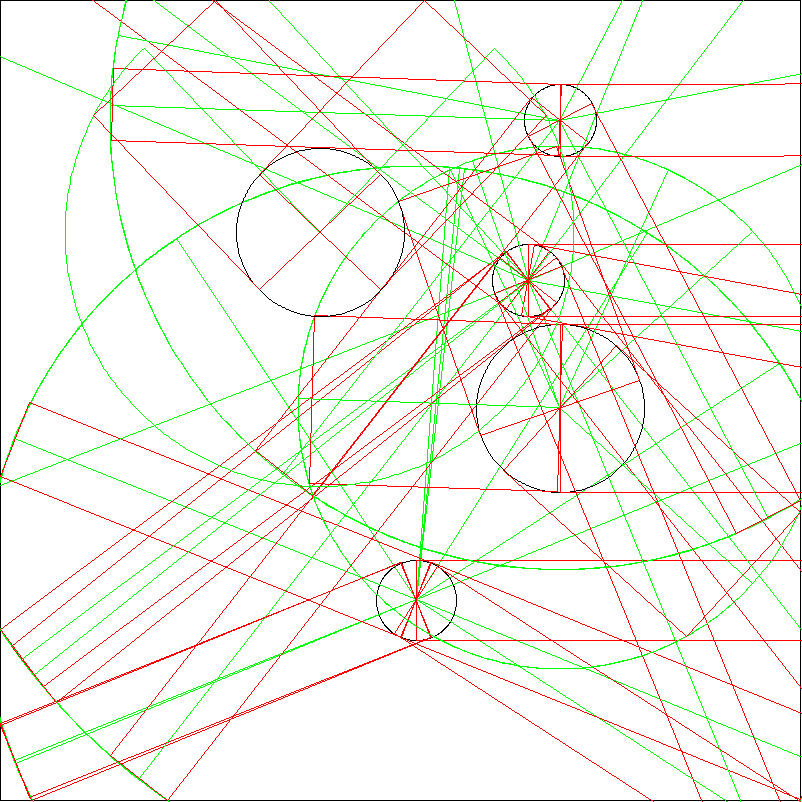

Forest 77
5 tree(s) can be cut



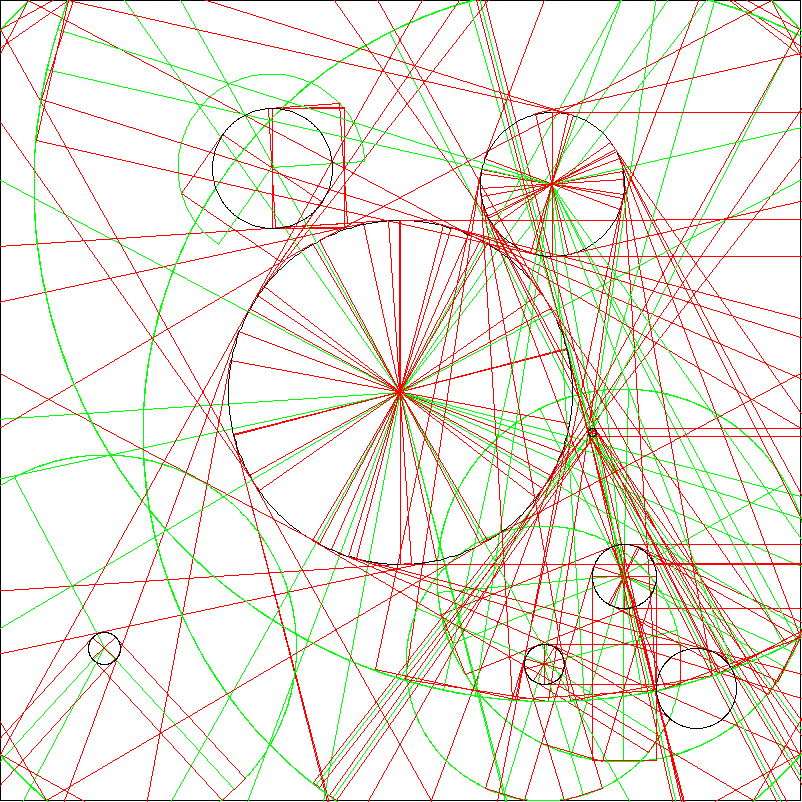

Forest 78
6 tree(s) can be cut



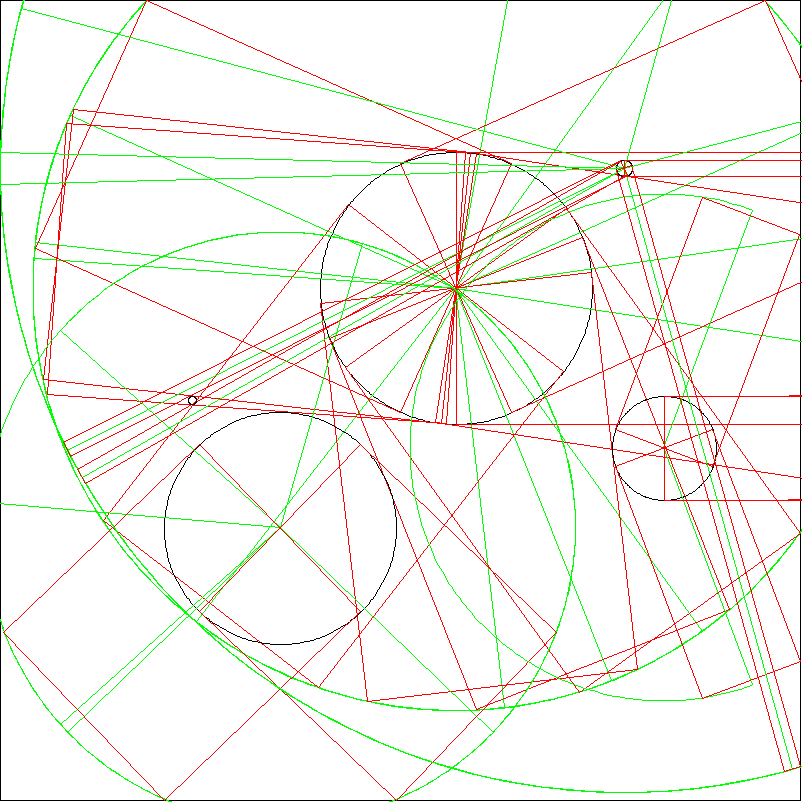

Forest 79
5 tree(s) can be cut



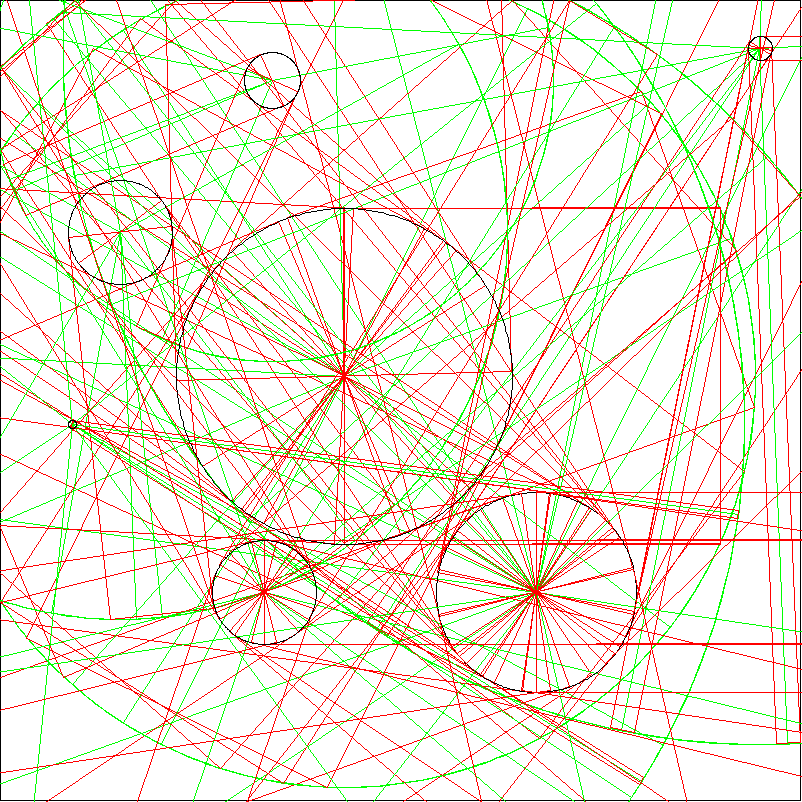

Forest 80
6 tree(s) can be cut



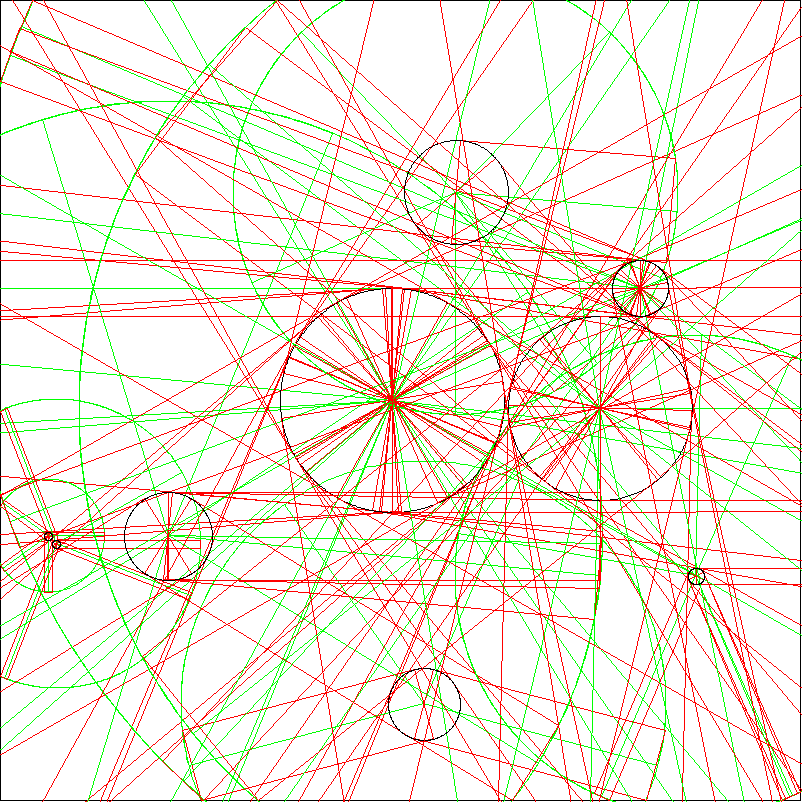

Forest 81
7 tree(s) can be cut



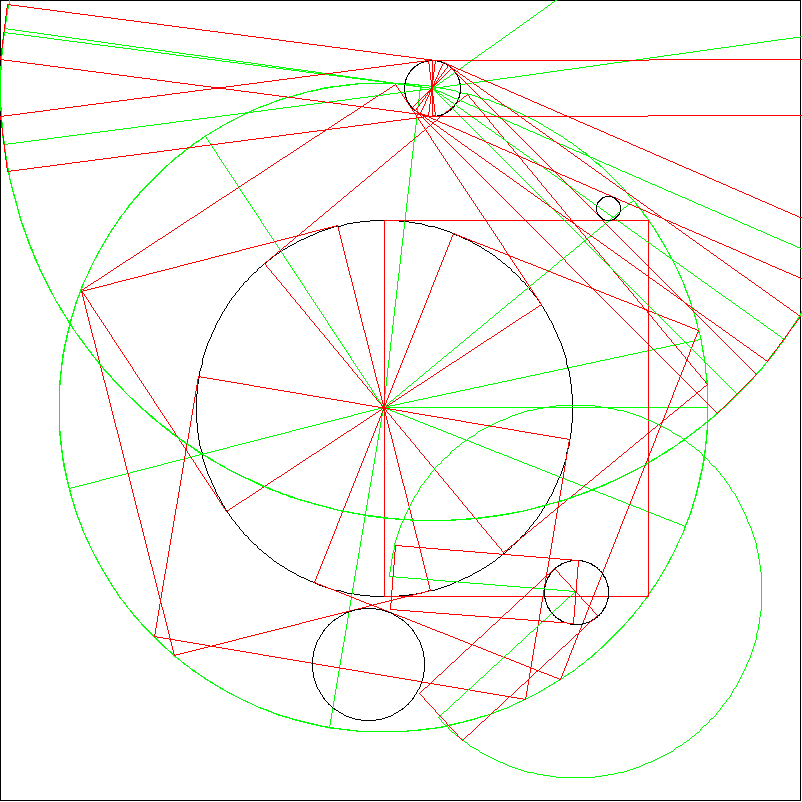

Forest 82
5 tree(s) can be cut



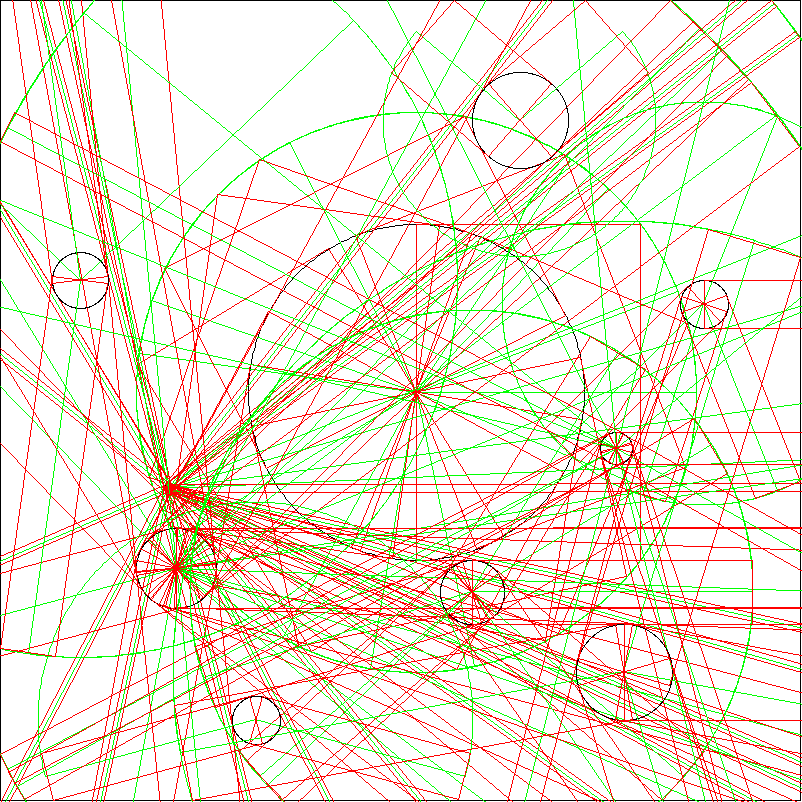

Forest 83
10 tree(s) can be cut



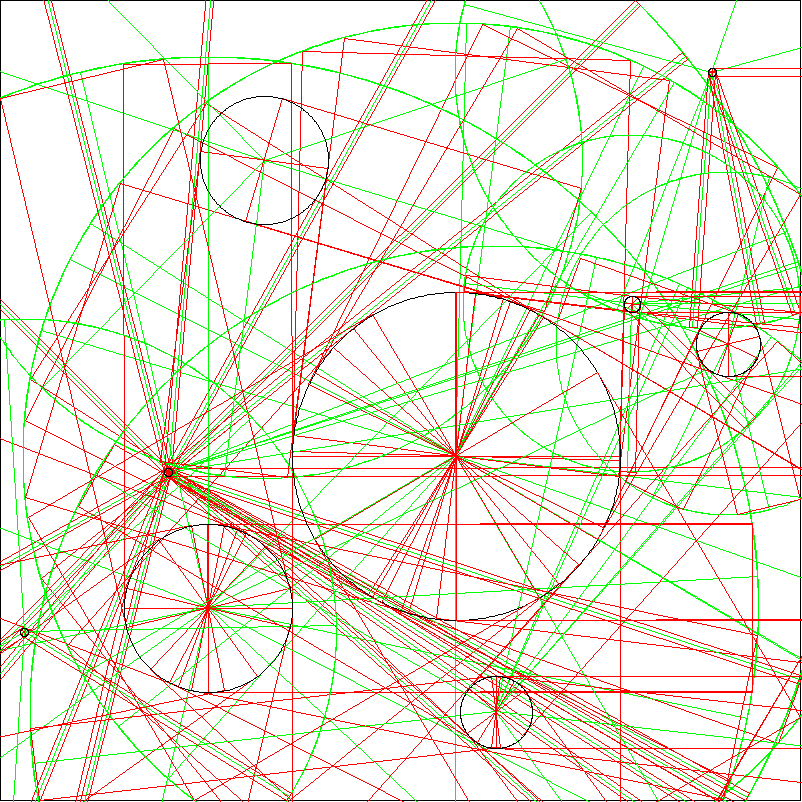

Forest 84
9 tree(s) can be cut



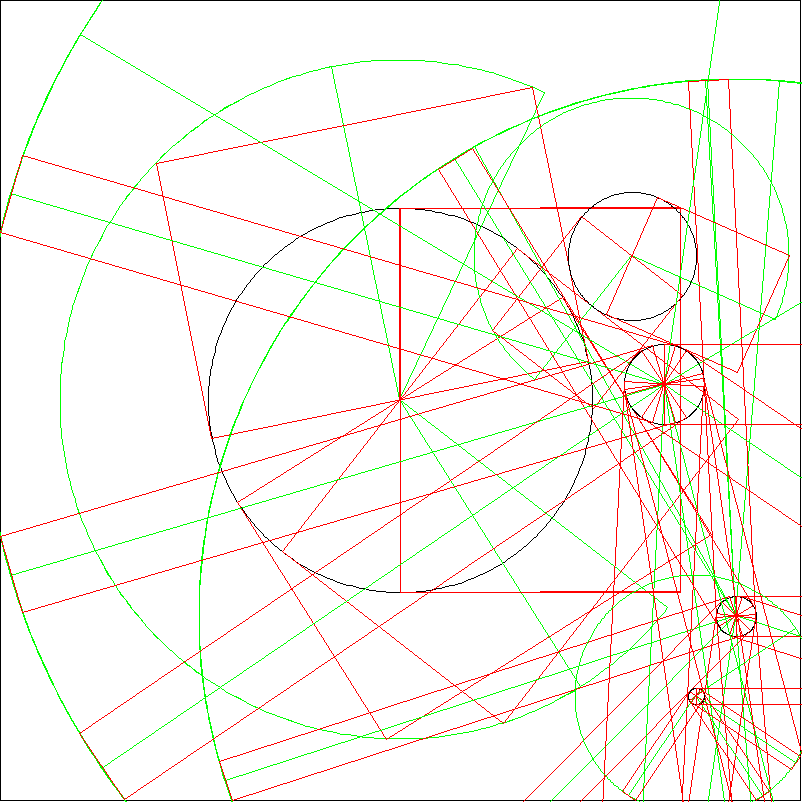

Forest 85
5 tree(s) can be cut



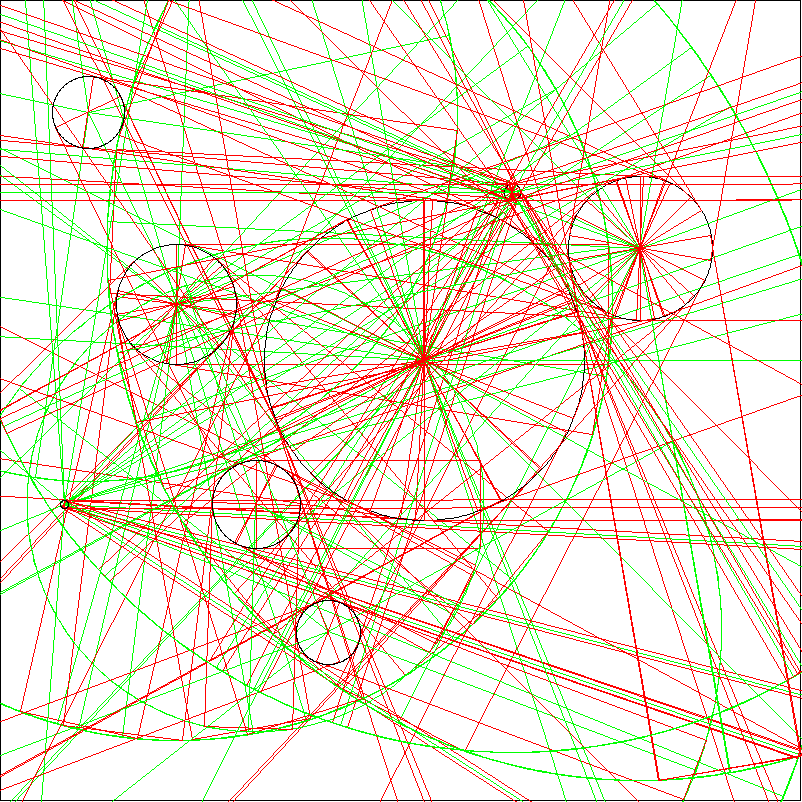

Forest 86
5 tree(s) can be cut



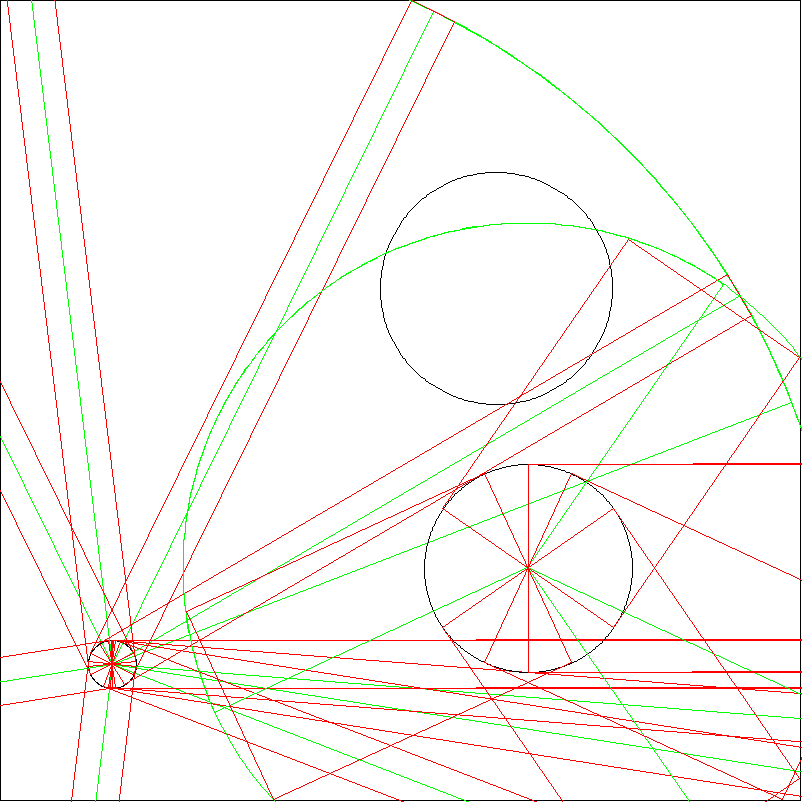

Forest 87
3 tree(s) can be cut



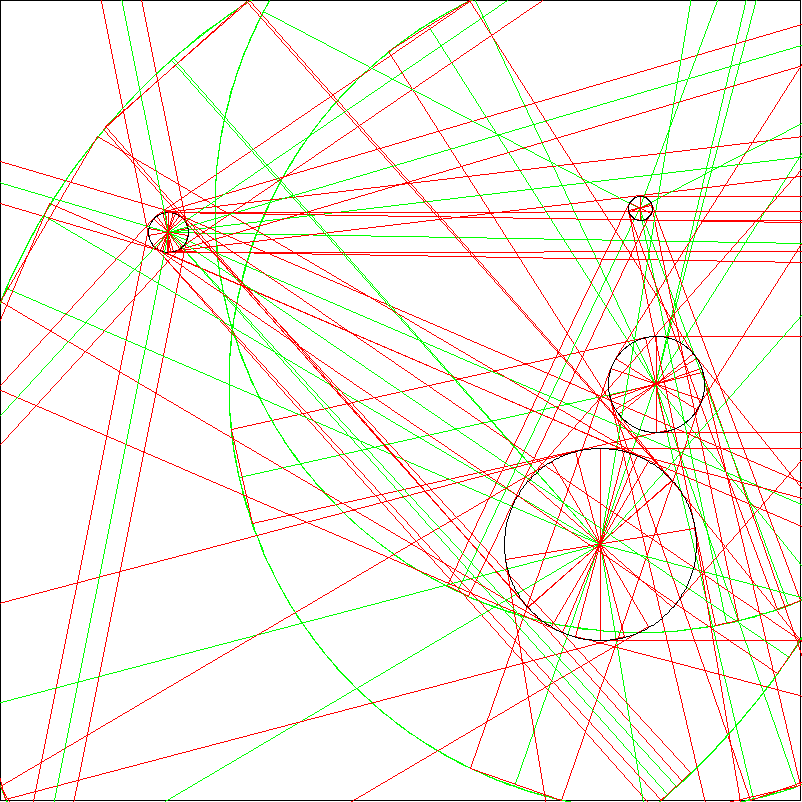

Forest 88
4 tree(s) can be cut



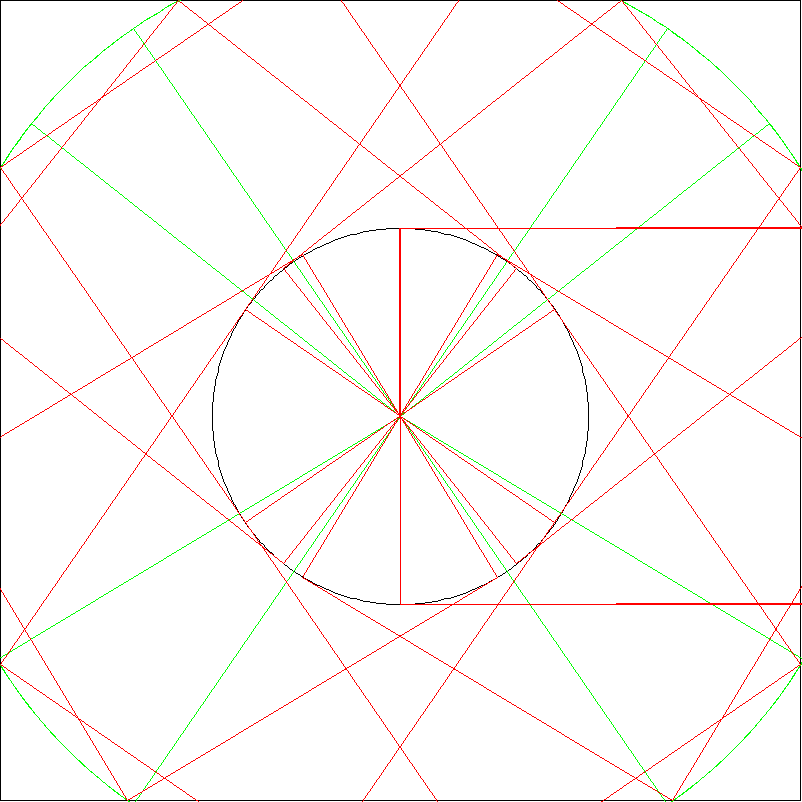

Forest 89
0 tree(s) can be cut



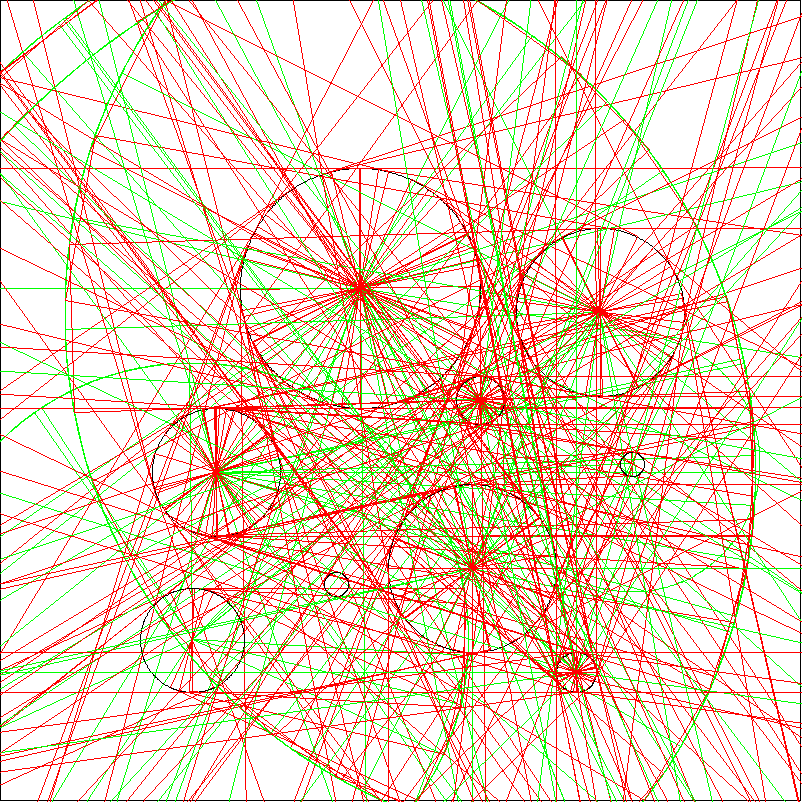

Forest 90
3 tree(s) can be cut



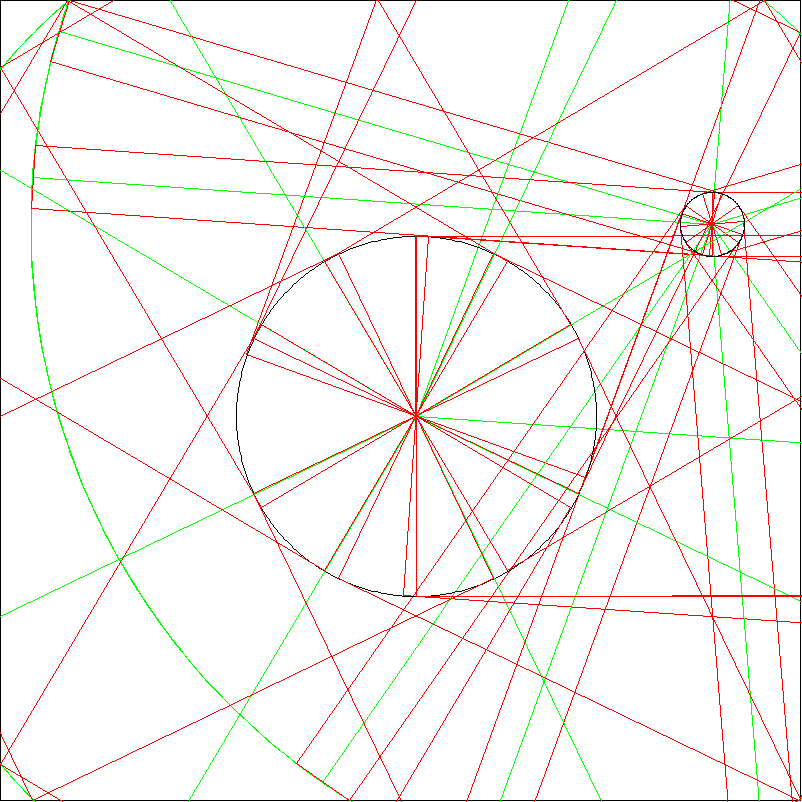

Forest 91
1 tree(s) can be cut



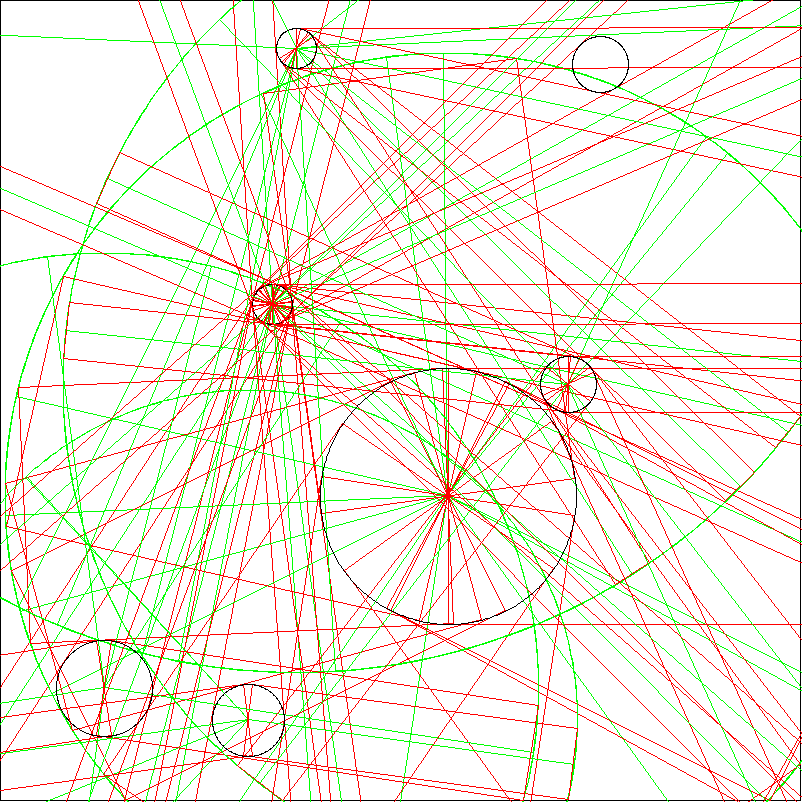

Forest 92
6 tree(s) can be cut



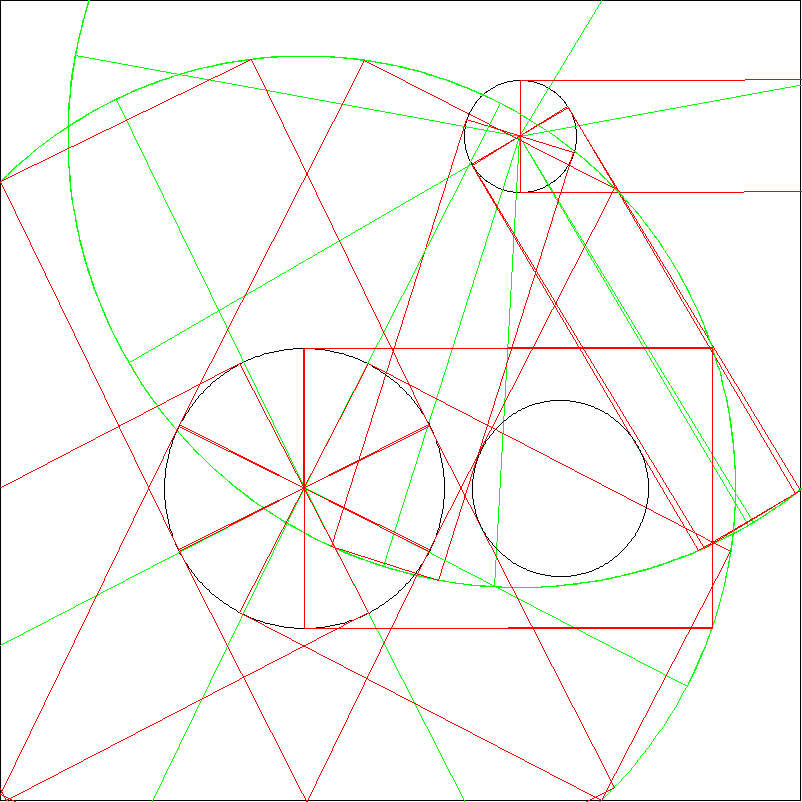

Forest 93
3 tree(s) can be cut



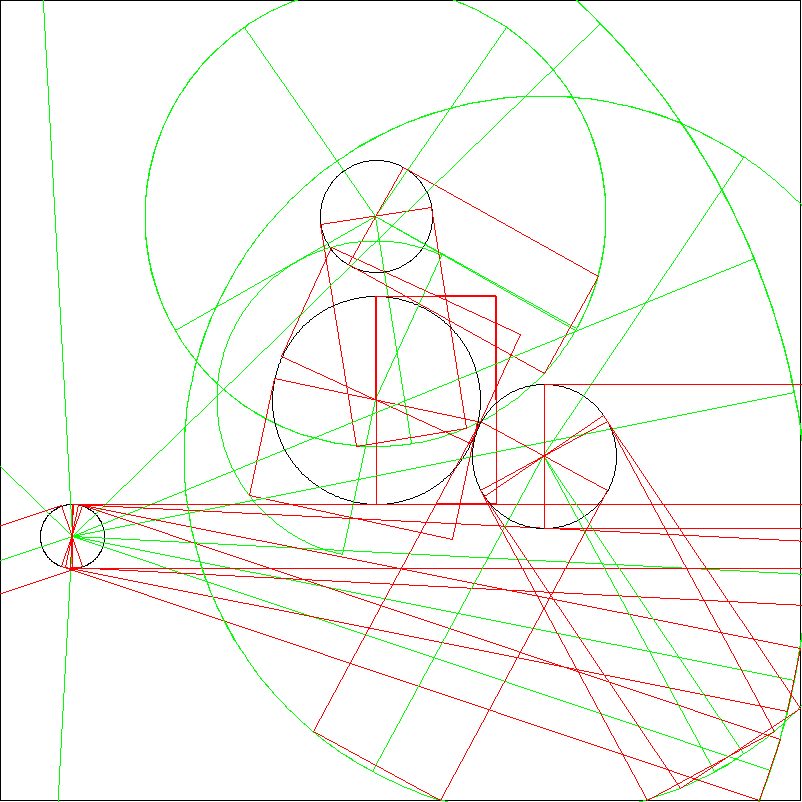

Forest 94
4 tree(s) can be cut



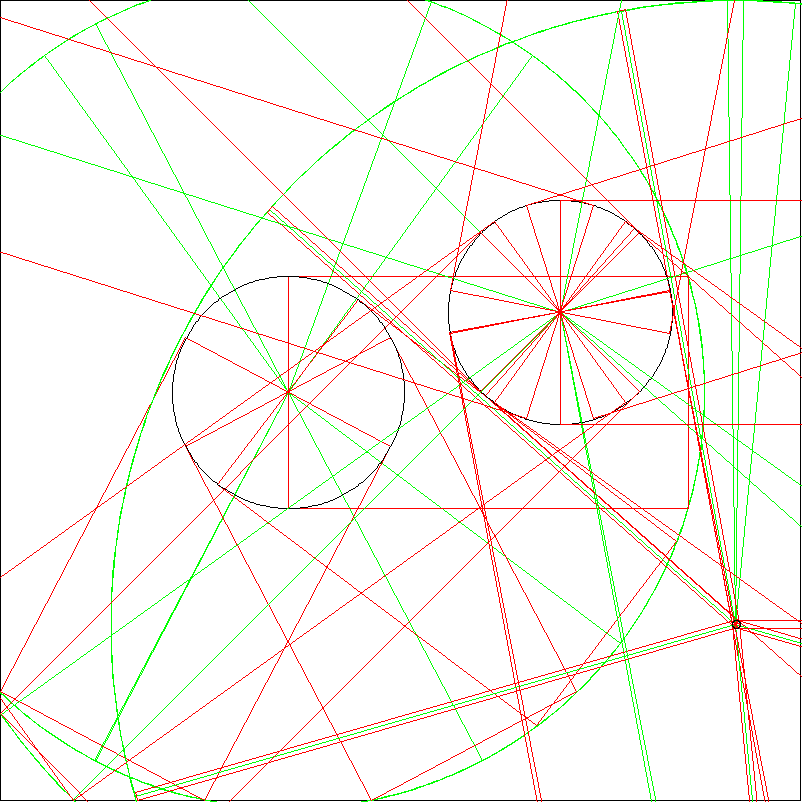

Forest 95
2 tree(s) can be cut



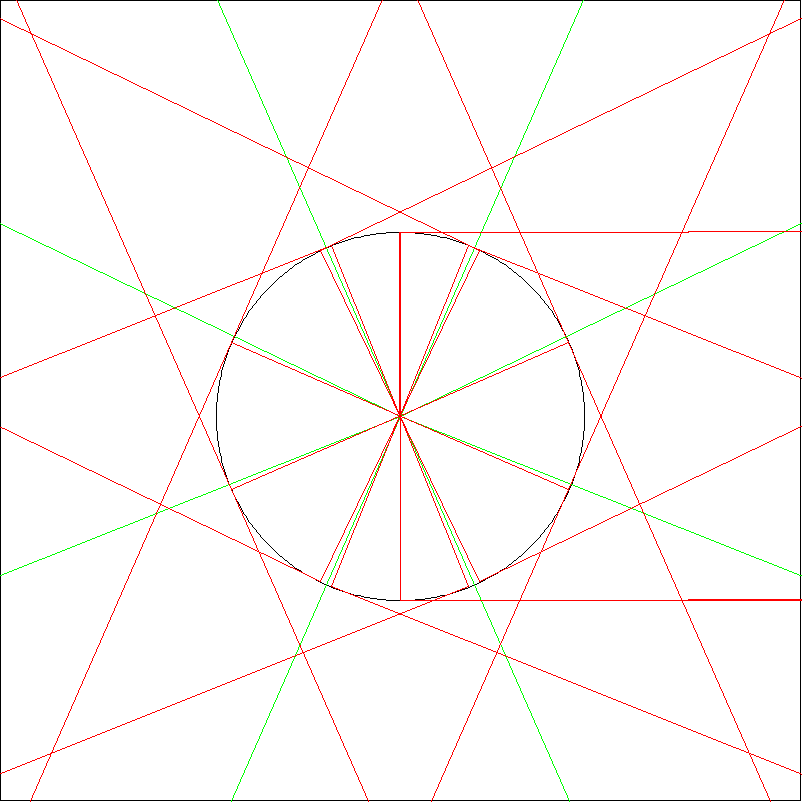

Forest 96
0 tree(s) can be cut



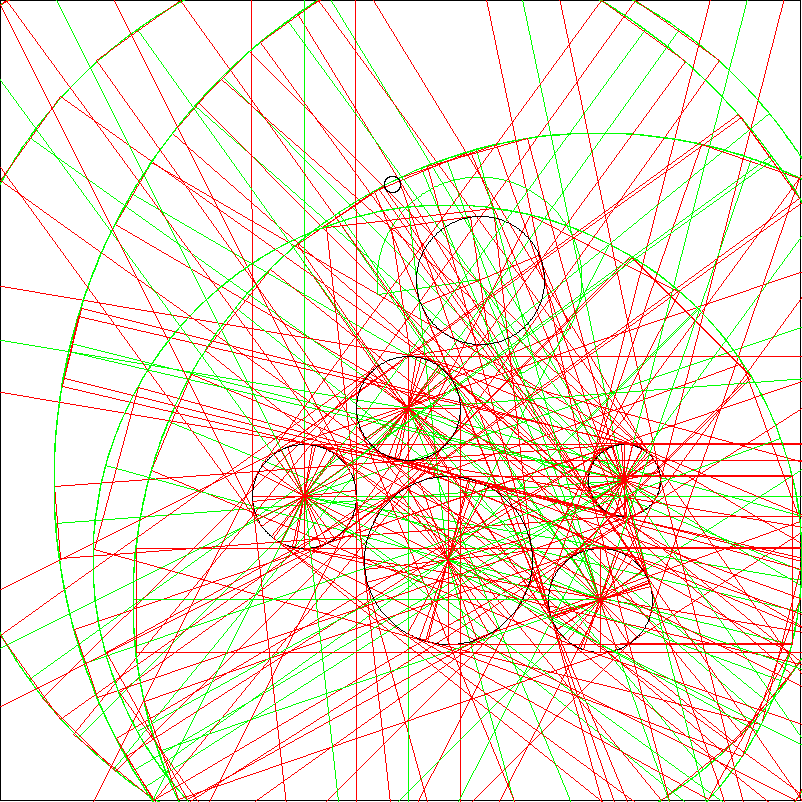

Forest 97
7 tree(s) can be cut



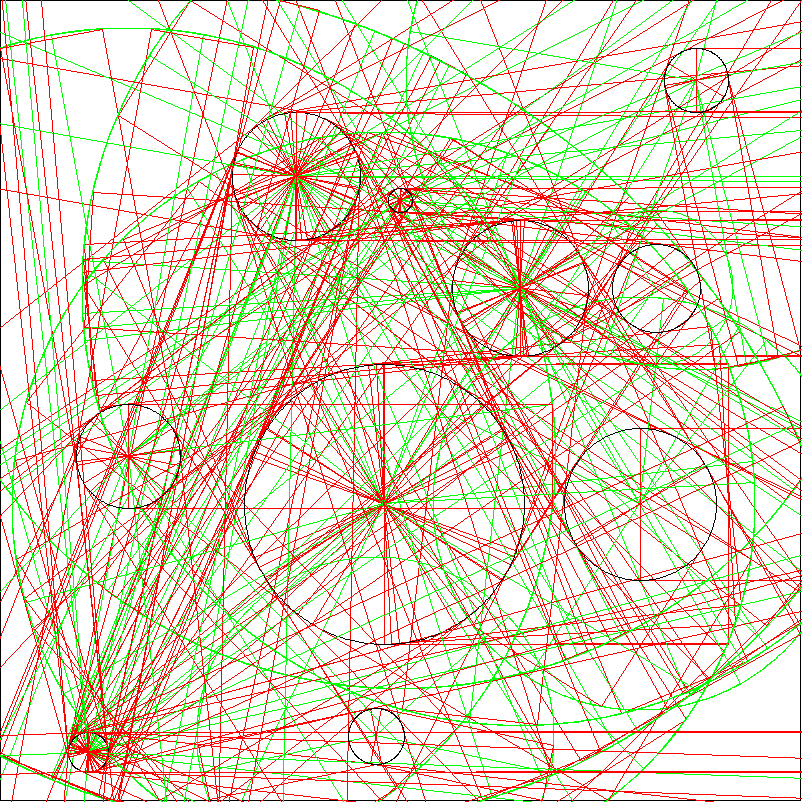

Forest 98
10 tree(s) can be cut



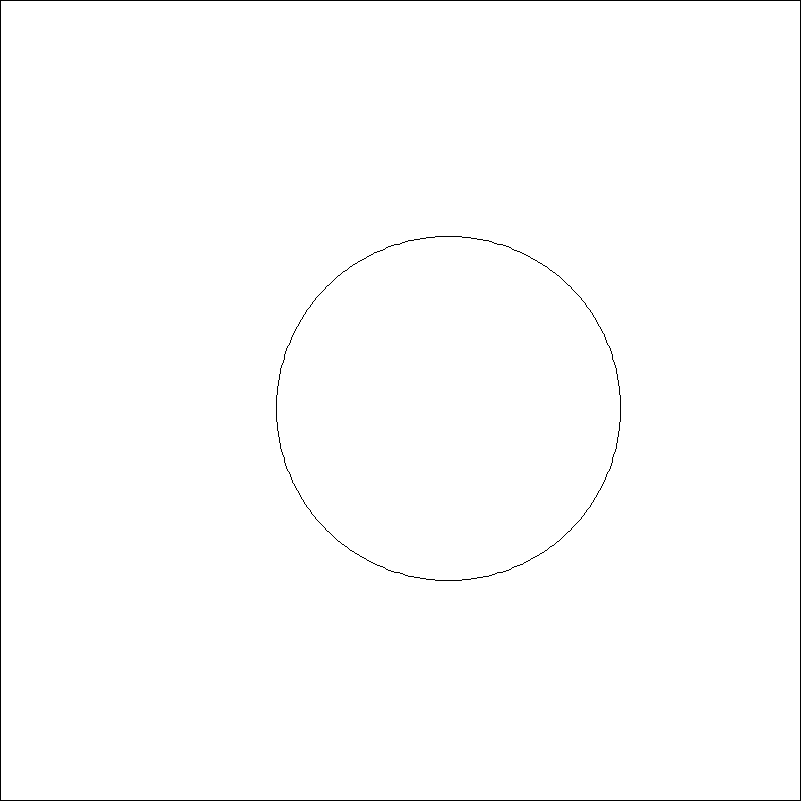

Forest 99
1 tree(s) can be cut



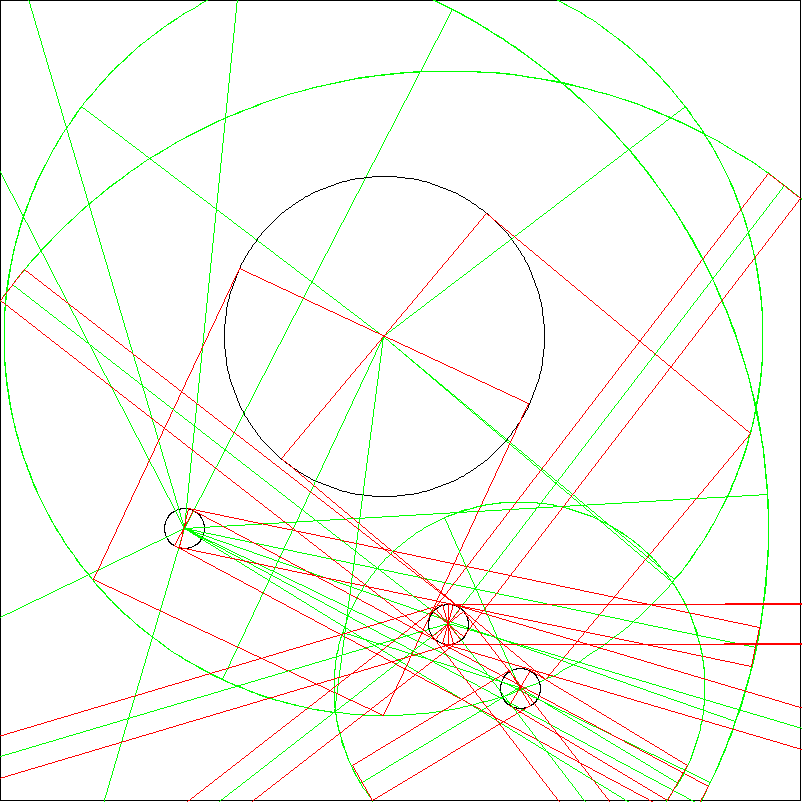

Forest 100
4 tree(s) can be cut



In [2]:
import collections
import math
import sys
from PIL import Image, ImageDraw
from IPython.core.display import display

epsilon = 1e-9
Tree = collections.namedtuple('Tree', 'x,y,d,h')

class ObstacleSet(object):
  def __init__(self, r1, h1, x_min, x_max, y_min, y_max):
    self.r1, self.h1, self.max_reach, self.x_min, self.x_max, self.y_min, self.y_max = r1, h1, math.sqrt(r1*r1+h1*h1), 8.0*x_min, 8.0*x_max, 8.0*y_min, 8.0*y_max
    self._angles = []
    
  def add_fence(self, distance, offset, tree, draw):
    if self.max_reach >= distance + epsilon:
      angle = math.acos(distance / self.max_reach) + math.atan(self.r1 / self.h1)
      draw.pieslice([8.0*(tree.x-self.max_reach), 8.0*(tree.y-self.max_reach),8.0*(tree.x+self.max_reach), 8.0*(tree.y+self.max_reach)],
                    ((360 + (offset * 180/math.pi)) - ((-angle) * (180.0/math.pi))), ((360 + (offset * 180/math.pi)) -((angle)*(180.0/math.pi))), outline=(0,255,0))
      self._angles.append((-angle + offset, angle + offset))
  def add_tree(self, distance, r2, offset, tree, draw):
    if self.max_reach >= distance - r2 + epsilon:
      angle = math.asin((self.r1 + r2) / distance)
      draw.pieslice([8.0*(tree.x-self.max_reach), 8.0*(tree.y-self.max_reach),8.0*(tree.x+self.max_reach), 8.0*(tree.y+self.max_reach)],
                    ((360 + (offset * 180/math.pi)) - ((-angle) * (180.0/math.pi))), ((360 + (offset * 180/math.pi)) -((angle)*(180.0/math.pi))), outline=(0,255,0))
      self._angles.append((-angle + offset, angle + offset))
  def has_gap(self, tree, draw):
    for i in range(len(self._angles)):
      ##print(i)
      left, right = self._angles[i]
      
      left = math.fmod(left, 2.0 * math.pi)
      if left < 0.0:
        left += 2.0 * math.pi
      right = math.fmod(right, 2.0 * math.pi)
      if right < 0.0:
        right += 2.0 * math.pi
      if left <= right:
        self._angles[i] = (left, right)
      else:
        self._angles[i] = (left, 2.0 * math.pi)
        self._angles.append((0.0, right))
    self._angles.sort()
    limit = 0.0
    for left, right in self._angles:
      ##points on circle  
      x4 = 8.0 * (tree.x + (0.5 * tree.d) * math.cos(left+0.5 *math.pi) - (0.0 * tree.h) * math.sin(left+0.5 *math.pi))
      y4 = 8.0 * (tree.y + (0.0 * tree.h) * math.cos(left+0.5 *math.pi) + (0.5 * tree.d) * math.sin(left+0.5 *math.pi))
      x3 = 8.0 * (tree.x - (0.5 * tree.d) * math.cos(left+0.5 *math.pi) - (0.0 * tree.h) * math.sin(left+0.5 *math.pi))
      y3 = 8.0 * (tree.y + (0.0 * tree.h) * math.cos(left+0.5 *math.pi) - (0.5 * tree.d) * math.sin(left+0.5 *math.pi))
      ##the other ones
      x1 = 8.0 * (tree.x + (0.5 * tree.d) * math.cos(left+0.5 *math.pi) + (1.0 * tree.h) * math.sin(left+0.5 *math.pi))
      y1 = 8.0 * (tree.y - (1.0 * tree.h) * math.cos(left+0.5 *math.pi) + (0.5 * tree.d) * math.sin(left+0.5 *math.pi))
      x2 = 8.0 * (tree.x - (0.5 * tree.d) * math.cos(left+0.5 *math.pi) + (1.0 * tree.h) * math.sin(left+0.5 *math.pi))
      y2 = 8.0 * (tree.y - (1.0 * tree.h) * math.cos(left+0.5 *math.pi) - (0.5 * tree.d) * math.sin(left+0.5 *math.pi))
      ##if x1 >= self.x_min and x1 <= self.x_max and y1 >= self.x_min and y1 <= self.y_max and x2 >= self.y_min and x2 <= self.x_max and y2 >= self.y_min and y2 <= self.y_max:  
      draw.polygon((x1,y1,x2,y2,x3,y3,x4,y4), outline=(255,0,0))
      ##points on circle
      x4 = 8.0 * (tree.x + (0.5 * tree.d) * math.cos(right+0.5 *math.pi) - (0.0 * tree.h) * math.sin(right+0.5 *math.pi))
      y4 = 8.0 * (tree.y + (0.0 * tree.h) * math.cos(right+0.5 *math.pi) + (0.5 * tree.d) * math.sin(right+0.5 *math.pi))
      x3 = 8.0 * (tree.x - (0.5 * tree.d) * math.cos(right+0.5 *math.pi) - (0.0 * tree.h) * math.sin(right+0.5 *math.pi))
      y3 = 8.0 * (tree.y + (0.0 * tree.h) * math.cos(right+0.5 *math.pi) - (0.5 * tree.d) * math.sin(right+0.5 *math.pi))
      ##the other ones
      x1 = 8.0 * (tree.x + (0.5 * tree.d) * math.cos(right+0.5 *math.pi) + (1.0 * tree.h) * math.sin(right+0.5 *math.pi))
      y1 = 8.0 * (tree.y - (1.0 * tree.h) * math.cos(right+0.5 *math.pi) + (0.5 * tree.d) * math.sin(right+0.5 *math.pi))
      x2 = 8.0 * (tree.x - (0.5 * tree.d) * math.cos(right+0.5 *math.pi) + (1.0 * tree.h) * math.sin(right+0.5 *math.pi))
      y2 = 8.0 * (tree.y - (1.0 * tree.h) * math.cos(right+0.5 *math.pi) - (0.5 * tree.d) * math.sin(right+0.5 *math.pi))
      ##if x1 >= self.x_min and x1 <= self.x_max and y1 >= self.x_min and y1 <= self.y_max and x2 >= self.y_min and x2 <= self.x_max and y2 >= self.y_min and y2 <= self.y_max:  
      draw.polygon((x1,y1,x2,y2,x3,y3,x4,y4), outline=(255,0,0))
      if left > limit + epsilon:
        return True
      if right > limit:
        limit = right
    return limit + epsilon < 2.0 * math.pi

def main():
  case_num = 1
  with open('uva1003.in', 'r') as f:
    while True:
        nums = list(map(int, f.readline().split()))
        if not any(nums):
          break
        ##print(list(nums))
        x_min, y_min, x_max, y_max, num_trees = list(nums)
        trees = [Tree(*map(int, f.readline().split())) for _ in range(0, num_trees)]
        handle_case(case_num, x_min, y_min, x_max, y_max, trees)
        case_num += 1

def handle_case(case_num, x_min, y_min, x_max, y_max, trees):
  remain = set(range(len(trees)))
  base = Image.new('RGB', (802, 802), (255,255,255))
  draw = ImageDraw.Draw(base)
  draw.rectangle((8.0*x_min, 8.0*y_min, 8.0*x_max, 8.0*y_max), outline=(0,0,0))

  while remain:
    progress = False
    for i, tree in enumerate(trees):
      max_fall = math.sqrt((0.5 * tree.d) * (0.5 * tree.d) + tree.h * tree.h)
      draw.ellipse((8.0*(tree.x-(0.5 * tree.d)), 8.0*(tree.y-(0.5*tree.d)),8.0*(tree.x+(0.5 * tree.d)), 8.0*(tree.y+(0.5*tree.d))), outline=(0,0,0))
      ##draw.ellipse((4*(tree.x-max_fall), 4*(tree.y-max_fall),4*(tree.x+max_fall), 4*(tree.y+max_fall)), outline=(0,0,255))
      if i not in remain:
        continue
      obs = ObstacleSet(0.5 * tree.d, tree.h, x_min, x_max, y_min, y_max)
      obs.add_fence(x_max - tree.x, 0, tree, draw)
      obs.add_fence(y_max - tree.y, 0.5 * math.pi, tree, draw)
      obs.add_fence(tree.x - x_min, math.pi, tree, draw)
      obs.add_fence(tree.y - y_min, 1.5 * math.pi, tree, draw)
      for j, tree2 in enumerate(trees):
        if j == i or j not in remain:
          continue
        dx = tree2.x - tree.x
        dy = tree2.y - tree.y
        if dy > 0:
          if dx > 0:
            angle = math.atan2(dy, dx)
          else:
            angle = math.atan2(-dx, dy) + 0.5 * math.pi
        else:
          if dx < 0:
            angle = math.atan2(-dy, -dx) + math.pi
          else:
            angle = math.atan2(dx, -dy) + 1.5 * math.pi
        obs.add_tree(math.sqrt(dx * dx + dy * dy), 0.5 * tree2.d, angle, tree, draw)
      if obs.has_gap(tree, draw):
        ##print("found tree %d forest %d" % (i, case_num))
        remain.discard(i)
        progress = True
    if not progress:
      break
  display(base)
  print('Forest {}\n{} tree(s) can be cut\n'.format(case_num, len(trees) - len(remain)))

main()